In [2]:
import numpy as np
import pandas as pd

# Metadata stats and merging metadata files (3 studies)

## 1. Metadata check cols

### ROSMAP

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('./AMP_AD_datasets/ROSMAP_Covariates_ages_censored.tsv', sep='\t')

# Calculating the number of unique values in each column
unique_values = df.nunique()

unique_values


specimenID                                      2456
individualID                                    1128
diagnosis                                          3
tissue                                             3
race                                               3
spanish                                            2
apoe4_allele                                       3
sex                                                2
final_batch                                       17
pmi                                              437
RIN                                              214
RIN2                                             214
age_death                                        454
AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED    2368
RnaSeqMetrics_PCT_INTRONIC_BASES                2450
RnaSeqMetrics_PCT_INTERGENIC_BASES              2377
RnaSeqMetrics_PCT_CODING_BASES                  2448
dtype: int64

In [ ]:
df.columns

In [ ]:
column_names = ['diagnosis', 'tissue', 'race', 'spanish',
       'apoe4_allele', 'sex', 'final_batch', 'pmi', 'RIN', 'RIN2', 'age_death']

# Function to print unique values and their counts for given column names
def print_unique_values_counts(dataframe, columns):
    for column in columns:
        print(f"Unique value counts for {column}:")
        print(dataframe[column].value_counts())
        print("\n")  # Print a newline for better readability between columns

# Call the function with the DataFrame and list of column names
print_unique_values_counts(df, column_names)

### MSSB

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('./AMP_AD_datasets/MSBB_Covariates_ages_censored.tsv', sep='\t')

# Calculating the number of unique values in each column
unique_values = df.nunique()

unique_values


In [ ]:
df.columns

In [ ]:
column_names = ['tissue', 'sex', 'race', 'spanish', 'ethnicity',
       'age_death', 'RIN', 'RIN2', 'diagnosis', 'sequencingBatch', 'pmi',
       'apoe4_allele']

# Function to print unique values and their counts for given column names
def print_unique_values_counts(dataframe, columns):
    for column in columns:
        print(f"Unique value counts for {column}:")
        print(dataframe[column].value_counts())
        print("\n")  # Print a newline for better readability between columns

# Call the function with the DataFrame and list of column names
print_unique_values_counts(df, column_names)

### MAYO

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('./AMP_AD_datasets/Mayo_Covariates_ages_censored.tsv', sep='\t')

# Calculating the number of unique values in each column
unique_values = df.nunique()

unique_values


In [ ]:
df.columns

In [ ]:
column_names = ['tissue', 'diagnosis', 'apoe4_allele',
       'sex', 'flowcell', 'pmi', 'RIN', 'RIN2', 'age_death']

# Function to print unique values and their counts for given column names
def print_unique_values_counts(dataframe, columns):
    for column in columns:
        print(f"Unique value counts for {column}:")
        print(dataframe[column].value_counts())
        print("\n")  # Print a newline for better readability between columns

# Call the function with the DataFrame and list of column names
print_unique_values_counts(df, column_names)

## 2. Name Corrections in metadata files before merging files

In [ ]:
import pandas as pd

# Step 1: Load the DataFrame from a TSV file
file_path = './AMP_AD_datasets/Mayo_Covariates_ages_censored.tsv'  # Update this to your actual file path
df = pd.read_csv(file_path, sep='\t')

df = df.rename(columns={'flowcell': 'batch'})

# Step 2: Identify unique values in 'batch' column and sort them alphabetically
unique_batches = sorted(df['batch'].unique())

# Step 3: Assign a unique number to each sorted unique value
batch_to_number = {batch: i+1 for i, batch in enumerate(unique_batches)}

# Step 4: Replace the original 'batch' values in the DataFrame with the assigned numbers
df['batch'] = df['batch'].map(batch_to_number)

# Step 5: Save the modified DataFrame as a CSV file
new_file_path = './AMP_AD_datasets/MAYO_metadata_v1.csv'  # Update this to your desired new file path
df.to_csv(new_file_path, index=False)  # Set index=False to avoid saving the index as a separate column


In [ ]:
df

## 3. Merging the metadata files

In [ ]:
import pandas as pd

# List of CSV file names
file_names = ['./AMP_AD_datasets/ROSMAP_metadata_v1.csv', 
              './AMP_AD_datasets/MSBB_metadata_v1.csv', 
              './AMP_AD_datasets/MAYO_metadata_v1.csv']

# Empty list to hold DataFrames
dfs = []

# Columns to ensure are in each DataFrame
required_columns = ['race', 'spanish', 'ethnicity']

# Step 1: Read each CSV file and process
for file_name in file_names:
    # Read the CSV file
    df = pd.read_csv(file_name)
    
   
    # Ensure all required columns are present, add them if they are not
    for column in required_columns:
        if column not in df.columns:
            df[column] = pd.NA
    
    df['study'] = file_name.split('/')[2].split('_')[0]
            
    # Append to the list of DataFrames
    dfs.append(df)

# Use the column order of the first DataFrame for all others, including any new columns
column_order = dfs[0].columns.tolist()

# Reorder and concatenate, ensuring all DataFrames have the same column order
merged_df = pd.concat([df.reindex(columns=column_order) for df in dfs], ignore_index=True)

# Step 5: Save the merged DataFrame to a new CSV file
merged_df.to_csv('./merged_metadata.csv', index=False)


In [ ]:
merged_df

## 4. Mapping values to numerics in merged metadata

In [ ]:
import pandas as pd

# Path to your CSV file
file_path = './merged_metadata.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Dictionaries for conversion
diagnosis = {'AD':1, 'CT':0, 'OTHER':2, 'PSP':3, 'PATH_AGE':4}
sex = {'male': 0, 'female': 1}
tissue = {'ACC': 1, 'CBE': 2, 'DLPFC': 3, 'FP': 4, 'IFG': 5, 'PCC': 6, 'PHG': 7, 'STG': 8, 'TCX': 9}

# Convert values in the 'diagnosis', 'sex', and 'tissue' columns using the map method
df['diagnosis'] = df['diagnosis'].map(diagnosis)
df['sex'] = df['sex'].map(sex)
df['tissue'] = df['tissue'].map(tissue)

# Change '90+' value in the 'age_death' column to 90
df['age_death'] = df['age_death'].replace('90+', 90)

# Save the modified DataFrame back to a new CSV file
df.to_csv('./metadata_v1.csv', index=False)


In [ ]:
df

In [ ]:
# Calculate the number of NULL values in each column
null_values = df.isnull().sum()

# Print the result
print(null_values)

## 5. Filtering metadata with diagnosis

In [ ]:
import pandas as pd

# Load the DataFrame from a CSV file
file_path = './metadata_v1.csv'  # Replace 'your_file_path.csv' with the path to your actual CSV file
df = pd.read_csv(file_path)

# Filter the DataFrame
filtered_df = df[df['diagnosis'].isin([0, 1])]
filtered_df.reset_index(drop=True)
filtered_df.to_csv('metadata_v2_d_filtered.csv', index=False)


In [3]:
file_path = './metadata_merged.csv'  # Replace 'your_file_path.csv' with the path to your actual CSV file
df = pd.read_csv(file_path)
df

specimenID individualID  diagnosis  tissue  race  spanish  apoe4_allele  \
0     487_120515     R9904978          0       3   1.0      2.0             0   
1     182_120424     R9818080          0       3   1.0      2.0             0   
2     193_120424     R9817161          1       3   1.0      2.0             0   
3     694_120605     R9817056          0       3   1.0      2.0             0   
4     366_120502     R9809661          1       3   1.0      2.0             1   
...          ...          ...        ...     ...   ...      ...           ...   
2100     948_CBE          948          1       2   NaN      NaN             0   
2101     952_CBE          952          1       2   NaN      NaN             1   
2102     966_CBE          966          1       2   NaN      NaN             2   
2103     976_CBE          976          1       2   NaN      NaN             1   
2104     991_CBE          991          1       2   NaN      NaN             1   

      sex  batch        pmi  RIN   RIN2  age_death  \
0       0      4  12.433333  6.9  47.61  72.720055   
1       0      7  16.000000  8.4  70.56  81.111567   
2       1      4   1.750000  7.1  50.41  80.906229   
3       0      4   6.416667  7.1  50.41  87.753593   
4       1      7  17.416667  7.4  54.76  90.000000   
...   ...    ...        ...  ...    ...        ...   
2100    1     24   4.000000  7.9  62.41  82.000000   
2101    1     30   3.000000  9.0  81.00  83.000000   
2102    1     22  16.000000  8.8  77.44  79.000000   
2103    1     19   7.000000  8.3  68.89  90.000000   
2104    0     27  12.077553  9.3  86.49  87.000000   

      AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED  \
0                                         0.931411   
1                                         0.944450   
2                                         0.958718   
3                                         0.960609   
4                                         0.931962   
...                                            ...   
2100                                      0.971513   
2101                                      0.970183   
2102                                      0.971717   
2103                                      0.975052   
2104                                      0.966562   

      RnaSeqMetrics_PCT_INTRONIC_BASES  RnaSeqMetrics_PCT_INTERGENIC_BASES  \
0                             0.225013                            0.058488   
1                             0.172408                            0.041036   
2                             0.203963                            0.048166   
3                             0.201002                            0.045065   
4                             0.205742                            0.048650   
...                                ...                                 ...   
2100                          0.218398                            0.102550   
2101                          0.289034                            0.107290   
2102                          0.143079                            0.069472   
2103                          0.134213                            0.080812   
2104                          0.128365                            0.122418   

      RnaSeqMetrics_PCT_CODING_BASES ethnicity   study  
0                           0.342722       NaN  ROSMAP  
1                           0.394201       NaN  ROSMAP  
2                           0.357855       NaN  ROSMAP  
3                           0.397276       NaN  ROSMAP  
4                           0.378299       NaN  ROSMAP  
...                              ...       ...     ...  
2100                        0.312080       NaN    MAYO  
2101                        0.266025       NaN    MAYO  
2102                        0.374848       NaN    MAYO  
2103                        0.370581       NaN    MAYO  
2104                        0.333899       NaN    MAYO  

[2105 rows x 19 columns]

In [15]:
# Assuming 'df' is your loaded DataFrame
# df1 = df[df['study'] == 'MAYO']
df1 = df

# Count the number of unique values in each column of the filtered DataFrame
unique_values_per_column = df1.nunique()

# Print the number of unique values in each column
print(unique_values_per_column)

specimenID                                      2105
individualID                                     835
diagnosis                                          2
tissue                                             9
race                                               4
spanish                                            2
apoe4_allele                                       3
sex                                                2
batch                                             33
pmi                                              362
RIN                                              141
RIN2                                             141
age_death                                        215
AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED    2060
RnaSeqMetrics_PCT_INTRONIC_BASES                2102
RnaSeqMetrics_PCT_INTERGENIC_BASES              2069
RnaSeqMetrics_PCT_CODING_BASES                  2099
ethnicity                                          5
study                                         

In [16]:
diagnosis_counts = df1['diagnosis'].value_counts()
print(diagnosis_counts)

diagnosis
1    1363
0     742
Name: count, dtype: int64


In [93]:
file_path = './metadata_merged.csv'  # Replace 'your_file_path.csv' with the path to your actual CSV file
df = pd.read_csv(file_path)

# Check the number of samples per tissue type
tissue_counts = df['tissue'].value_counts()

# Print the counts
print("Number of samples per tissue type:")
print(tissue_counts)

Number of samples per tissue type:
tissue
3    436
1    265
6    250
7    226
8    220
4    215
5    201
9    148
2    144
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data if not already done
# df_metadata = pd.read_csv('metadata.csv')

# Calculate counts
tissue_counts = df['study'].value_counts().reset_index()
tissue_counts.columns = ['Diagnosis', 'Number of Samples']

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Diagnosis', y='Number of Samples', data=tissue_counts, palette='viridis')
plt.title('Histogram of Samples per study')
plt.xlabel('Study')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.show()
plt.savefig('./figures/study_distribution_histogram.png', dpi=900)

## Visualization of distribution in metadata

In [ ]:
rosmap_df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './metadata_v3.csv'

# Load the CSV file into a pandas DataFrame
rosmap_df = pd.read_csv(file_path)


columns_to_visualize = ['diagnosis', 'tissue', 'apoe4_allele', 'sex']

# Adjust figsize for overall figure and subplot size, making each chart smaller
# Increase the height as needed to separate the charts more
fig, axes = plt.subplots(len(columns_to_visualize), 1, figsize=(6, 3 * len(columns_to_visualize)))

for i, column in enumerate(columns_to_visualize):
    # For each column, count the occurrences of each unique value
    value_counts = rosmap_df[column].value_counts()
    
    # Plotting the bar chart for the current column
    axes[i].bar(value_counts.index.astype(str), value_counts.values, color='blue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('Value')
  # Rotate x-axis labels for better readability

# Adjust layout padding
plt.tight_layout(pad=3.0)  # Increase pad size for more space between subplots

plt.show()


## Distribution of gene expresion levels Histogram

In [ ]:
import pandas as pd

dff = pd.read_csv("/home/vmottaqi/rnaseq_synapse/AMP_AD_datasets/ROSMAP_Normalized_counts_(CQN).tsv", sep='\t')

df = dff.iloc[:, 1:]
# Count negative values across the DataFrame
negative_values_count = (df < 0).sum().sum()  # Sums up all the True values for the condition df < 0

# Count NaN (NULL) values across the DataFrame
null_values_count = df.isnull().sum().sum()  # Sums up all the NaN values

print(f"Total negative values in the dataset: {negative_values_count}")
print(f"Total NULL (NaN) values in the dataset: {null_values_count}")


In [ ]:
dff

In [ ]:
import pandas as pd
import numpy as np  # For numerical operations

# Load your DataFrame, ensuring the first column (gene names) is read as a regular column
df = pd.read_csv("/home/vmottaqi/rnaseq_synapse/AMP_AD_datasets/ROSMAP_Normalized_counts_(CQN).tsv", sep='\t')

# Calculate the median and variance for each gene across samples
df['Median'] = df.iloc[:, 1:].mean(axis=1)  # Exclude the first column (gene names) for calculation
df['Variance'] = df.iloc[:, 1:].var(axis=1)  # Exclude the first column (gene names) for calculation

# Transform the median and variance back from log2 values
df['Median_back_transformed'] = np.power(2, df['Median'])
df['Variance_back_transformed'] = np.power(2, df['Variance'])

# Create a new DataFrame with gene names, median, variance, and their back-transformed values
output_df = df[['feature', 'Median', 'Variance', 'Median_back_transformed', 'Variance_back_transformed']]

# Save the new DataFrame to a CSV file
output_df.to_csv('mean_ROSMAP.csv', index=False)

print("Gene expression statistics computed and back-transformed values added successfully.")


In [ ]:
dff = pd.read_csv("mean_ROSMAP.csv")
dff

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame with median and variance back-transformed values
df = pd.read_csv('median_ROSMAP.csv')

# Histogram for Median_back_transformed
plt.figure(figsize=(8, 5))
plt.hist(df['Median_back_transformed'], bins=3000, alpha=0.7)
plt.xlabel('Expression Levels')
plt.ylabel('Frequency')
plt.title('Median of gene expression levels')
plt.legend()
plt.xlim(0, 600)  # Limiting the x-axis to be between 0 and 2
plt.show()

# Histogram for Variance_back_transformed
plt.figure(figsize=(8, 5))
# Use np.logspace to create logarithmic bins
logbins = np.logspace(np.log10(df['Variance_back_transformed'].min()), np.log10(df['Variance_back_transformed'].max()), 50)
plt.hist(df['Variance_back_transformed'], bins=logbins, alpha=0.7, color='orange')
plt.xscale('log')  # Set x-axis to log scale
plt.xlabel('Variance (log scale)')
plt.ylabel('Frequency')
plt.title('Variance of gene expression levels')
plt.legend()
plt.show()
plt.savefig("mean_r.png")

# Feature importance selection (Ignored)

## Chi-Square method for categorical

In [ ]:
import pandas as pd

# Load the DataFrame from a CSV file
file_path = './b'  # Replace 'your_file_path.csv' with the path to your actual CSV file
df = pd.read_csv(file_path)

# Filter the DataFrame
ROSMAP_df = df[(df['study'] == 'ROSMAP') & (df['diagnosis'].isin([0, 1]))]

# Display the filtered DataFrame
ROSMAP_df


FileNotFoundError: [Errno 2] No such file or directory: './metadata_v1.csv'

In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Assuming ROSMAP_df is already defined and loaded with your data

# Specify your binary target column and the list of categorical independent variable names
target_column = 'diagnosis'
independent_variables = ['tissue', 'race', 'spanish', 'apoe4_allele', 'sex', 'batch']

# Ensure the target variable is binary and encoded as 0s and 1s
le = LabelEncoder()
ROSMAP_df.loc[:, target_column] = le.fit_transform(ROSMAP_df[target_column])

# Convert categorical variables to type 'category' if they aren't already
for var in independent_variables:
    ROSMAP_df.loc[:, var] = ROSMAP_df[var].astype('category')

# Note: There's a mistake in your chi2 function call; it should reference ROSMAP_df, not df
chi_scores, p_values = chi2(ROSMAP_df[independent_variables].apply(lambda x: x.cat.codes), ROSMAP_df[target_column])

# Display the p-values for each independent variable
for var, p in zip(independent_variables, p_values):
    print(f"P-value for {var}: {p}")


In [ ]:
ROSMAP_df

## Normality of the continous independent variables

In [ ]:
import pandas as pd
from scipy.stats import shapiro


# List of your continuous variable column names
continuous_variables = ['pmi', 'RIN', 'RIN2', 'age_death', 'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED', 'RnaSeqMetrics_PCT_INTRONIC_BASES', 'RnaSeqMetrics_PCT_INTERGENIC_BASES',
                        'RnaSeqMetrics_PCT_CODING_BASES']  # Replace these with your actual column names

# Initialize an empty dictionary to store Shapiro-Wilk test results
normality_test_results = {}

# Perform the Shapiro-Wilk test for each variable
for var in continuous_variables:
    stat, p_value = shapiro(ROSMAP_df[var].dropna())  # dropna() to remove missing values
    normality_test_results[var] = p_value

    # Interpret the results
    alpha = 0.05  # Significance level
    if p_value > alpha:
        print(f"{var}: Data looks normal (fail to reject H0, p-value={p_value:.3f})")
    else:
        print(f"{var}: Data does not look normal (reject H0, p-value={p_value:.3f})")


## Reg model for continous variables p-value

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Specify your binary target column and list of independent variable names
target_column = 'diagnosis'  # Replace with your actual target column name
independent_variables = ['pmi', 'RIN', 'RIN2', 'age_death', 'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED', 'RnaSeqMetrics_PCT_INTRONIC_BASES', 'RnaSeqMetrics_PCT_INTERGENIC_BASES',
                        'RnaSeqMetrics_PCT_CODING_BASES']

# Ensure the independent variables and target are correctly formatted
X = ROSMAP_df[independent_variables]
y = ROSMAP_df[target_column]

# Add a constant to the independent variables set for statsmodels
X = sm.add_constant(X)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y, X).fit()

# Display the summary of the model which includes p-values among other statistics
print(model.summary())


# Datasets filtering (cleaning)

Filtering the RNAseq datasets (genes and samples)

### 1. Harmonizing genes throughout three datasets (separately)

In [5]:
rnaseq = pd.read_csv('./AMP_AD_datasets/ROSMAP_Residualized_counts_(age-death).tsv', sep='\t', header=None).T

# Set the first row as the header
rnaseq.columns = rnaseq.iloc[0]

# Drop the first row as it's now set as the header
rnaseq = rnaseq[1:]

# Set the first column as the index
rnaseq.set_index(rnaseq.columns[0], inplace=True)


rnaseq

/tmp/ipykernel_39067/1349606160.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262

0                 ENSG00000000003       ENSG00000000419      ENSG00000000457  \
feature                                                                        
510_120515      0.547178095212917    0.0309218787590315  -0.0372678350757441   
207_120424     -0.466698175292601    -0.097938553258727  -0.0709106002656966   
81_120417       0.021058836508973  -0.00130081588164402    0.287300932732309   
649_120529      0.932153793701418     0.175135505673658   0.0768413389176011   
487_120515     -0.832440008601364     0.110146830267783    0.144344480774273   
...                           ...                   ...                  ...   
RISK_84_redo    0.675761108168252     0.327420793379606    0.487027691294158   
RISK_9_rerun    -0.54626276839276   -0.0539197707375027   -0.178287526141687   
RISK_93         0.504201542299034      0.20235041178395    0.298144698198822   
RISK_94         0.356525716520059     0.237729964019099    0.166071398180446   
RISK_97       -0.0307273917433946     0.325485578189496    0.170935918120915   

0                ENSG00000000460      ENSG00000000938      ENSG00000000971  \
feature                                                                      
510_120515     0.396124646614575    0.432101014475444      1.2173794211485   
207_120424     0.337465773675399    0.418961040098725  -0.0767611780301326   
81_120417      0.142445519279894    0.853906096000501    0.513618640911416   
649_120529    -0.484958454505552   -0.858708587093736   -0.273069212454823   
487_120515    -0.112420584036463   -0.498994438928982    0.691244142360738   
...                          ...                  ...                  ...   
RISK_84_redo  0.0838413948487905    0.737589269664486     1.08757354904832   
RISK_9_rerun  -0.283913738073636    -0.71556248594123     -1.5291401239508   
RISK_93        0.121036560985348   -0.159570962193653   -0.173865559619338   
RISK_94       0.0561579649869614   -0.589365887833161   -0.486405712762818   
RISK_97       -0.217593048146873  -0.0945991218448621  -0.0446358924306769   

0                 ENSG00000001036     ENSG00000001084      ENSG00000001167  \
feature                                                                      
510_120515    0.00184357604205262  -0.140853888875604  -0.0846701267847237   
207_120424     -0.206077526876193  -0.192994069034581  -0.0707552325529832   
81_120417      -0.434044546548744  -0.430917973099305   -0.396874845609266   
649_120529     0.0768352247447077   0.328137474073671  -0.0716498134906481   
487_120515     -0.844905882644524   -1.26032416418812   -0.371007751379133   
...                           ...                 ...                  ...   
RISK_84_redo    0.234150891258945   0.337132422723094   0.0407395431818992   
RISK_9_rerun   -0.504561826072045  -0.229724215597815   -0.429624525112165   
RISK_93        0.0455031549998374   0.123694236067999   0.0308491478959837   
RISK_94        0.0654347095611836  0.0802847740682909  -0.0880065004325445   
RISK_97       -0.0920501645767283  -0.137075460748986   -0.271081606240932   

0                 ENSG00000001460  ... ENSG00000288030 ENSG00000288033  \
feature                            ...                                   
510_120515      0.107804287085237  ...       -0.019012       -1.011139   
207_120424      0.125610196786115  ...        0.464913       -0.494513   
81_120417     -0.0482636079044048  ...       -0.973615        0.447193   
649_120529      0.324524781916795  ...       -0.766962       -0.472437   
487_120515      0.218281528783633  ...         0.26475       -0.302026   
...                           ...  ...             ...             ...   
RISK_84_redo   -0.303667166693484  ...        0.400455        0.291289   
RISK_9_rerun    0.337475734707598  ...        0.056668       -0.632197   
RISK_93        -0.581814680587119  ...        0.866037       -0.476356   
RISK_94       -0.0838374811856119  ...        0.133441        0.517389   
RISK_97        -0.114806434772462  ...   

In [25]:
rnaseq_M = pd.read_csv('./AMP_AD_datasets/MSBB_Residualized_counts_(age-death).tsv', sep='\t')
rnaseq_M

feature  BM_22_213  BM_22_222  BM_22_229  BM_22_230  BM_22_231  \
0      ENSG00000000003  -0.440839  -0.294355  -0.235035   0.001006  -0.051514   
1      ENSG00000000419  -0.172975   0.267638   0.321670   0.103272  -0.047664   
2      ENSG00000000457   0.072720  -0.026264   0.006241  -0.009697  -0.046194   
3      ENSG00000000460  -0.043224  -0.051674   0.006664  -0.121447   0.041086   
4      ENSG00000000938  -0.400903  -0.244879  -0.379937  -0.165596  -0.224235   
...                ...        ...        ...        ...        ...        ...   
22731  ENSG00000288095   0.709894   0.168444   0.450307  -0.560976   0.601653   
22732  ENSG00000288100   0.621922   0.192910   0.318037  -0.229780  -0.107528   
22733  ENSG00000288105   0.003278  -0.289240   0.335171  -0.112366  -0.364427   
22734  ENSG00000288107  -0.643405  -0.364214   0.649343  -0.057022   0.011027   
22735  ENSG00000288110   0.386156   0.427496   0.501922   0.336083   0.222862   

       BM_22_234  BM_22_238  BM_10_546  BM_10_548  ...  hB_RNA_8615_B82C014  \
0      -0.026957   0.138184  -0.073510   0.063737  ...            -0.047515   
1       0.196706  -0.204395  -0.200556   0.046340  ...            -0.251311   
2       0.136720  -0.079417   0.130126   0.035272  ...            -0.136530   
3      -0.111174   0.146073  -0.262509  -0.060753  ...            -0.146490   
4      -0.553473   0.497983  -0.619214  -0.257782  ...             0.410473   
...          ...        ...        ...        ...  ...                  ...   
22731  -0.168019  -0.026577   0.205750   0.238008  ...            -0.824737   
22732   0.312059   0.124294   0.817250   0.441431  ...             0.428939   
22733   0.441828  -0.238788   0.377831   0.128952  ...            -1.416209   
22734  -0.764223  -0.016882  -0.091106   0.443950  ...             0.396003   
22735  -0.043481  -0.231382   0.183180   0.376192  ...            -0.009885   

       hB_RNA_8675_L43C014  hB_RNA_9115_B82C014  hB_RNA_9166_L43C014  \
0                 0.140873            -0.469587            -0.249220   
1                -0.013615            -0.086787            -0.353774   
2                -0.245799             0.025430            -0.154809   
3                -0.121937            -0.122646            -0.107083   
4                 0.443761            -0.409516             0.220313   
...                    ...                  ...                  ...   
22731            -0.525506            -0.680036            -0.543798   
22732             1.274053            -0.626569            -0.574523   
22733            -0.250130            -0.771185             0.849072   
22734            -0.743601            -0.113433             0.507067   
22735            -0.047586            -0.035530            -0.312457   

       hB_RNA_9178_L43C014  hB_RNA_9180_L43C014  hB_RNA_9187_L43C014  \
0                -0.214102            -0.155606            -0.160073   
1                -0.157767            -0.107506             0.392958   
2                -0.147668             0.159630             0.126586   
3                 0.227418            -0.190781            -0.037205   
4                 0.386350            -0.406790            -0.204840   
...                    ...                  ...                  ...   
22731            -0.226232            -2.069647            -0.841448   
22732            -0.015924            -0.497546             0.489858   
22733            -0.443025             0.245024            -1.328633   
22734             0.431163            -0.201255            -0.088814   
22735             0.141370            -0.269087            -0.131861   

       hB_RNA_9189_E007C014  hB_RNA_9191_L43C014  hB_RNA_9208_L43C014  
0                  0.169776            -0.316625            -0.098290  
1                 -0.291032             0.024386             0.220543  
2                 -0.150515             0.213933            -0.389901  
3                  0.186447             0.034086            -0.270348  
4  

In [ ]:
# Common ensembl IDs between all the datasets

import pandas as pd

# Define a function to load, transpose, and set the first row as header
def load_and_prepare(filepath):
    # Load the file, without headers, then transpose
    df = pd.read_csv(filepath, sep='\t', header=None).T
    # Set the first row as the header
    df.columns = df.iloc[0]
    # Remove the first row now that it's set as the header
    df = df[1:]
    # Set the first column as the index
    df.set_index(df.columns[0], inplace=True)
    return df

# Load and prepare each dataset
df1 = load_and_prepare('./AMP_AD_datasets/ROSMAP_Residualized_counts_(age-death).tsv')
df2 = load_and_prepare('./AMP_AD_datasets/MSBB_Residualized_counts_(age-death).tsv')
df3 = load_and_prepare('./AMP_AD_datasets/Mayo_Residualized_counts_(age-death).tsv')

# Get the column names as sets
columns1 = set(df1.columns)
columns2 = set(df2.columns)
columns3 = set(df3.columns)

# Find the intersection of column names
common_columns = columns1 & columns2 & columns3

# Print the number of common columns
print(f"Number of common columns: {len(common_columns)}")

# Print the names of the common columns
print("\nCommon column names:")
for column in sorted(common_columns):
    print(column)


In [ ]:
# Clean the datasets and export -- ensembl IDs to gene symbol

In [49]:
import pandas as pd

# Load the gene ID conversion file
id_conversion_path = './david_genes_conversion.txt'
id_conversion = pd.read_csv(id_conversion_path, sep='\t')

# Create a dictionary to map Ensembl IDs to Gene Names
gene_map = dict(zip(id_conversion['From'], id_conversion['To']))
gene_map

{'ENSG00000179029': 'TMEM107',
 'ENSG00000180011': 'PTGR3',
 'ENSG00000156384': 'SFR1',
 'ENSG00000229852': 'KHDC1-AS1',
 'ENSG00000131089': 'ARHGEF9',
 'ENSG00000230844': 'ZNF674-AS1',
 'ENSG00000013810': 'TACC3',
 'ENSG00000205885': 'C1RL-AS1',
 'ENSG00000131080': 'EDA2R',
 'ENSG00000168374': 'ARF4',
 'ENSG00000228526': 'MIR34AHG',
 'ENSG00000155052': 'CNTNAP5',
 'ENSG00000179021': 'C3orf38',
 'ENSG00000156381': 'ANKRD9',
 'ENSG00000182685': 'BRICD5',
 'ENSG00000143079': 'CTTNBP2NL',
 'ENSG00000180008': 'SOCS4',
 'ENSG00000025800': 'KPNA6',
 'ENSG00000143061': 'IGSF3',
 'ENSG00000156374': 'PCGF6',
 'ENSG00000181350': 'LRRC75A',
 'ENSG00000131095': 'GFAP',
 'ENSG00000131097': 'HIGD1B',
 'ENSG00000168389': 'MFSD2A',
 'ENSG00000230852': 'LINC02857',
 'ENSG00000168385': 'SEPTIN2',
 'ENSG00000131094': 'C1QL1',
 'ENSG00000182670': 'TTC3',
 'ENSG00000168386': 'FILIP1L',
 'ENSG00000144395': 'CCDC150',
 'ENSG00000182674': 'KCNB2',
 'ENSG00000143067': 'ZNF697',
 'ENSG00000180035': 'ZNF48',
 'E

In [54]:
# Define a function to load, transpose, filter, rename, convert to float, and export a dataset
def process_dataset(file_path, gene_map, output_path):
    # Load the dataset, manage mixed data types warning by setting low_memory to False
    df = pd.read_csv(file_path, sep='\t', header=None, low_memory=False).T
    
    # Set the first row as the header (column names are Ensembl IDs)
    df.columns = df.iloc[0]
    df = df[1:]
    
    # Set the first column as the index
    df.set_index(df.columns[0], inplace=True)
    
    # Convert all gene expression data to float
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # Filter columns based on gene_map keys (Ensembl IDs)
    filtered_df = df.loc[:, df.columns.isin(gene_map.keys())]
    
    # Rename the columns using the gene_map
    filtered_df.rename(columns=gene_map, inplace=True)
    


    # Export the DataFrame
    filtered_df.to_csv(output_path)
    # print(final_df)

# Path to one of the datasets
dataset_path = './AMP_AD_datasets/Mayo_Residualized_counts_(diagnosis).tsv'
output_path = './AMP_AD_datasets/Mayo_v1_cols.csv'

# Process the dataset
process_dataset(dataset_path, gene_map, output_path)

/tmp/ipykernel_760/432076196.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns=gene_map, inplace=True)


In [55]:
df = pd.read_csv("./AMP_AD_datasets/Mayo_v1_cols.csv", index_col=0)
df

TSPAN6      DPM1     SCYL3     FIRRM       FGR       CFH  \
feature                                                                
1005_TCX  1.068612 -0.101281 -0.646434 -0.607810  0.557018  0.821677   
1010_TCX  1.400600 -0.056470 -0.542944 -1.179954  1.417282  0.906086   
1015_TCX  1.220523 -0.296701 -1.135370 -1.197778  1.665710  0.785732   
1019_TCX  1.309618 -0.091985 -0.371328 -0.547877  2.068842  1.732234   
1029_TCX  0.614572 -0.185632 -0.955229 -1.223171  2.413794  1.850549   
...            ...       ...       ...       ...       ...       ...   
948_CBE  -0.426868 -0.104909  0.008333 -0.678367 -0.331839  0.131425   
952_CBE  -0.511010 -0.196173 -0.537725 -1.452138  0.469393 -2.132757   
966_CBE  -0.025363 -0.000323  0.003503  0.243032 -0.633469  0.034772   
976_CBE   0.672469 -0.035666  0.233930  0.217314  0.505145  0.679639   
991_CBE   0.888483  0.044687 -0.333468 -0.115190  0.368081  0.691629   

             FUCA2      GCLC      NFYA     STPG1  ...     RENO1  LOC105376030  \
feature                                           ...                           
1005_TCX  1.084104  1.655561  0.551016 -0.230586  ... -1.685276     -1.734244   
1010_TCX  0.738444  1.159761  0.367700 -0.634470  ... -1.841050     -1.689525   
1015_TCX  0.666076  1.113502 -0.070869 -0.216504  ... -0.771351     -2.315911   
1019_TCX  0.503841  1.152539  0.260591 -0.297082  ... -1.863581     -1.627518   
1029_TCX  0.597204  1.082710  0.236200 -0.061779  ... -0.334123     -3.121265   
...            ...       ...       ...       ...  ...       ...           ...   
948_CBE   0.212101 -0.070641  0.047432  0.236184  ... -0.522347      0.532042   
952_CBE  -0.703451 -0.848650 -0.519402  0.363786  ...  0.858857     -0.281561   
966_CBE  -0.310798 -0.079054  0.203078  0.026697  ...  0.280892     -0.187527   
976_CBE   0.146305  0.296122 -0.151400 -0.156085  ... -0.457740      0.517132   
991_CBE   0.033943  0.370386 -0.030560 -0.118024  ...  0.223740     -1.857678   

          LOC107986626  LOC102724289  LINC03026  LOC124902204  LOC107986742  \
feature                                                                       
1005_TCX      0.162825      0.675243   0.419518      0.192180      0.005713   
1010_TCX      0.560417     -0.406683   0.185246      0.327622      0.074217   
1015_TCX      0.007702     -0.295853  -0.374057      0.105508     -0.043437   
1019_TCX      0.493869      0.387557  -0.262628     -0.154976      0.014247   
1029_TCX     -0.753955      0.391199  -0.171345     -0.176349      0.042736   
...                ...           ...        ...           ...           ...   
948_CBE       0.456984     -0.103929   0.666553      0.193082      0.279276   
952_CBE       0.084446      0.311883   0.250254     -0.249922      0.854351   
966_CBE       0.326858      0.498738  -0.556654     -0.165566     -0.595309   
976_CBE      -0.191756      0.036250   0.008297     -0.350369     -0.226253   
991_CBE      -0.559610      0.174379  -0.293122     -0.367931     -0.241495   

          LOC283045  LOC105377224  LOC101929748  
feature                                          
1005_TCX   1.176303     -1.394259      0.933726  
1010_TCX   0.395785     -2.588576      0.268773  
1015_TCX   0.309723     -3.083899      0.620649  
1019_TCX   0.306573     -1.587819     -0.110505  
1029_TCX   0.035959     -2.191649     -0.305262  
...             ...           ...           ...  
948_CBE    0.172546     -1.416390     -0.101523  
952_CBE   -0.965282     -1.601522      1.230199  
966_CBE    0.576540     -1.312718      0.224004  
976_CBE   -0.103642     -1.281930     -0.624040  
991_CBE   -1.042724     -0.350711      0.139999  

[505 rows x 15302 columns]

### 2. Filtering samples in each three datasets (diagnosis)

In [63]:
# Load the metadata file
metadata_path = 'metadata_merged.csv'  # Adjust path as needed
metadata = pd.read_csv(metadata_path)

# Filter the metadata to keep only rows where 'study' column is 'MAYO'
filtered_metadata = metadata[metadata['study'] == 'MAYO']
filtered_metadata

specimenID individualID  diagnosis  tissue  race  spanish  apoe4_allele  \
1813   1005_TCX         1005          1       9   NaN      NaN             0   
1814   1010_TCX         1010          1       9   NaN      NaN             0   
1815   1015_TCX         1015          1       9   NaN      NaN             1   
1816   1019_TCX         1019          1       9   NaN      NaN             1   
1817   1029_TCX         1029          1       9   NaN      NaN             0   
...         ...          ...        ...     ...   ...      ...           ...   
2100    948_CBE          948          1       2   NaN      NaN             0   
2101    952_CBE          952          1       2   NaN      NaN             1   
2102    966_CBE          966          1       2   NaN      NaN             2   
2103    976_CBE          976          1       2   NaN      NaN             1   
2104    991_CBE          991          1       2   NaN      NaN             1   

      sex  batch        pmi  RIN   RIN2  age_death  \
1813    1     12   8.000000  8.6  73.96       90.0   
1814    0     13   9.192620  8.3  68.89       63.0   
1815    0     11   6.000000  8.7  75.69       77.0   
1816    1      3   4.000000  7.8  60.84       86.0   
1817    1     13   4.000000  9.7  94.09       69.0   
...   ...    ...        ...  ...    ...        ...   
2100    1     24   4.000000  7.9  62.41       82.0   
2101    1     30   3.000000  9.0  81.00       83.0   
2102    1     22  16.000000  8.8  77.44       79.0   
2103    1     19   7.000000  8.3  68.89       90.0   
2104    0     27  12.077553  9.3  86.49       87.0   

      AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED  \
1813                                      0.961873   
1814                                      0.968423   
1815                                      0.956293   
1816                                      0.951529   
1817                                      0.966349   
...                                            ...   
2100                                      0.971513   
2101                                      0.970183   
2102                                      0.971717   
2103                                      0.975052   
2104                                      0.966562   

      RnaSeqMetrics_PCT_INTRONIC_BASES  RnaSeqMetrics_PCT_INTERGENIC_BASES  \
1813                          0.147683                            0.177731   
1814                          0.095055                            0.079429   
1815                          0.147571                            0.107888   
1816                          0.176513                            0.119104   
1817                          0.171432                            0.131141   
...                                ...                                 ...   
2100                          0.218398                            0.102550   
2101                          0.289034                            0.107290   
2102                          0.143079                            0.069472   
2103                          0.134213                            0.080812   
2104                          0.128365                            0.122418   

      RnaSeqMetrics_PCT_CODING_BASES ethnicity study  
1813                        0.302003       NaN  MAYO  
1814                        0.397425       NaN  MAYO  
1815                        0.343587       NaN  MAYO  
1816                        0.336038       NaN  MAYO  
1817                        0.323055       NaN  MAYO  
...                              ...       ...   ...  
2100                        0.312080       NaN  MAYO  
2101                        0.266025       NaN  MAYO  
2102                        0.374848       NaN  MAYO  
2103                        0.370581       NaN  MAYO  
2104                        0.333899       NaN  MAYO  

[292 rows x 19 columns]

In [64]:
# Load the RNA-seq dataset
rnaseq_path = './AMP_AD_datasets/Mayo_v1_cols.csv'  # Adjust path as needed
rnaseq = pd.read_csv(rnaseq_path, index_col=0)  # Assuming 'specimenID' is the index

# Filter the RNA-seq dataset to keep only samples present in the filtered metadata
filtered_rnaseq = rnaseq[rnaseq.index.isin(filtered_metadata['specimenID'])]

# Export the filtered RNA-seq dataset
output_path = './AMP_AD_datasets/Mayo_v2_samples.csv'  # Adjust path as needed
filtered_rnaseq.to_csv(output_path)

print("Filtered RNA-seq dataset has been saved to:", output_path)

Filtered RNA-seq dataset has been saved to: ./AMP_AD_datasets/Mayo_v2_samples.csv


In [65]:
filtered_rnaseq

TSPAN6      DPM1     SCYL3     FIRRM       FGR       CFH  \
feature                                                                
1005_TCX  1.068612 -0.101281 -0.646434 -0.607810  0.557018  0.821677   
1010_TCX  1.400600 -0.056470 -0.542944 -1.179954  1.417282  0.906086   
1015_TCX  1.220523 -0.296701 -1.135370 -1.197778  1.665710  0.785732   
1019_TCX  1.309618 -0.091985 -0.371328 -0.547877  2.068842  1.732234   
1029_TCX  0.614572 -0.185632 -0.955229 -1.223171  2.413794  1.850549   
...            ...       ...       ...       ...       ...       ...   
948_CBE  -0.426868 -0.104909  0.008333 -0.678367 -0.331839  0.131425   
952_CBE  -0.511010 -0.196173 -0.537725 -1.452138  0.469393 -2.132757   
966_CBE  -0.025363 -0.000323  0.003503  0.243032 -0.633469  0.034772   
976_CBE   0.672469 -0.035666  0.233930  0.217314  0.505145  0.679639   
991_CBE   0.888483  0.044687 -0.333468 -0.115190  0.368081  0.691629   

             FUCA2      GCLC      NFYA     STPG1  ...     RENO1  LOC105376030  \
feature                                           ...                           
1005_TCX  1.084104  1.655561  0.551016 -0.230586  ... -1.685276     -1.734244   
1010_TCX  0.738444  1.159761  0.367700 -0.634470  ... -1.841050     -1.689525   
1015_TCX  0.666076  1.113502 -0.070869 -0.216504  ... -0.771351     -2.315911   
1019_TCX  0.503841  1.152539  0.260591 -0.297082  ... -1.863581     -1.627518   
1029_TCX  0.597204  1.082710  0.236200 -0.061779  ... -0.334123     -3.121265   
...            ...       ...       ...       ...  ...       ...           ...   
948_CBE   0.212101 -0.070641  0.047432  0.236184  ... -0.522347      0.532042   
952_CBE  -0.703451 -0.848650 -0.519402  0.363786  ...  0.858857     -0.281561   
966_CBE  -0.310798 -0.079054  0.203078  0.026697  ...  0.280892     -0.187527   
976_CBE   0.146305  0.296122 -0.151400 -0.156085  ... -0.457740      0.517132   
991_CBE   0.033943  0.370386 -0.030560 -0.118024  ...  0.223740     -1.857678   

          LOC107986626  LOC102724289  LINC03026  LOC124902204  LOC107986742  \
feature                                                                       
1005_TCX      0.162825      0.675243   0.419518      0.192180      0.005713   
1010_TCX      0.560417     -0.406683   0.185246      0.327622      0.074217   
1015_TCX      0.007702     -0.295853  -0.374057      0.105508     -0.043437   
1019_TCX      0.493869      0.387557  -0.262628     -0.154976      0.014247   
1029_TCX     -0.753955      0.391199  -0.171345     -0.176349      0.042736   
...                ...           ...        ...           ...           ...   
948_CBE       0.456984     -0.103929   0.666553      0.193082      0.279276   
952_CBE       0.084446      0.311883   0.250254     -0.249922      0.854351   
966_CBE       0.326858      0.498738  -0.556654     -0.165566     -0.595309   
976_CBE      -0.191756      0.036250   0.008297     -0.350369     -0.226253   
991_CBE      -0.559610      0.174379  -0.293122     -0.367931     -0.241495   

          LOC283045  LOC105377224  LOC101929748  
feature                                          
1005_TCX   1.176303     -1.394259      0.933726  
1010_TCX   0.395785     -2.588576      0.268773  
1015_TCX   0.309723     -3.083899      0.620649  
1019_TCX   0.306573     -1.587819     -0.110505  
1029_TCX   0.035959     -2.191649     -0.305262  
...             ...           ...           ...  
948_CBE    0.172546     -1.416390     -0.101523  
952_CBE   -0.965282     -1.601522      1.230199  
966_CBE    0.576540     -1.312718      0.224004  
976_CBE   -0.103642     -1.281930     -0.624040  
991_CBE   -1.042724     -0.350711      0.139999  

[292 rows x 15302 columns]

In [16]:
# Load the RNA-seq dataset
rnaseq_path = './AMP_AD_datasets/ROSMAP_v2_samples.csv'  # Adjust path as needed
rnaseq = pd.read_csv(rnaseq_path, index_col=0)  # Assuming 'specimenID' is the index

# Find columns that contain any null values
columns_with_null = rnaseq.columns[rnaseq.isnull().any()].tolist()

# Print the column names that contain null values
print("Columns with null or NaN values:", columns_with_null)

Columns with null or NaN values: []


# Batch effect correction using ReCombat

In [1]:
import os
import numpy as np
import pandas as pd
from reComBat import reComBat

## Visualization plots

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns

def plot(data, metadata, plot_type='umap', name=None):
    # Prepare data
    features = data.values
    labels = metadata['batch'].astype('category').cat.codes  # Convert to categorical codes for coloring
    
    # Initialize and fit the reducer
    if plot_type == 'umap':
        reducer = UMAP(random_state=42)
        embedding = reducer.fit_transform(features)
        title = 'UMAP'
    elif plot_type == 'tsne':
        reducer = TSNE(n_components=2, random_state=42)
        embedding = reducer.fit_transform(features)
        title = 't-SNE'
    
    # Plot
    plt.figure(figsize=(7, 5))
    scatter = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=metadata['batch'], palette='deep', legend='full', s=60)
    plt.title(f'{title} {name}')
    plt.legend(title='Batch', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel(f'{title}-1')
    plt.ylabel(f'{title}-2')
    
    # Save the plot if a name is provided
    if name:
        plt.savefig(f"{name}_{plot_type.lower()}.png", dpi=900, bbox_inches='tight')
    plt.show()


/home/vmottaqi/.conda/envs/visual/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
# different variables showing in one plot
# Make the features categorical

import scanpy as sc
import anndata as an
import pandas as pd

def plot(data, metadata, type='tsne', plot_mode='all', name='Rosmap'):
    # Ensure metadata columns are categorical as needed
    categorical_columns = ['diagnosis', 'tissue', 'sex', 'batch']
    for col in categorical_columns:
        if col in metadata.columns:
            metadata[col] = metadata[col].astype('category')

    adata = an.AnnData(X=data, obs=metadata)

    if plot_mode == 'all':
        to_colour_by = ['diagnosis', 'tissue', 'sex', 'batch']
    else:
        to_colour_by = ['Zero-hop cluster']

    if type == 'tsne':
        sc.tl.tsne(adata, use_rep='X')
        if name is not None:
            sc.pl.tsne(adata, color=to_colour_by, show=False, ncols=1, hspace=0.25, 
                       legend_fontsize=8, save=f'_{name}.png')  # Save as PNG
        else:
            sc.pl.tsne(adata, color=to_colour_by, show=True, ncols=1, hspace=0.25, legend_fontsize=8)

    elif type == 'umap':
        sc.pp.neighbors(adata, use_rep='X')
        sc.tl.umap(adata)
        if name is not None:
            sc.pl.umap(adata, color=to_colour_by, show=True, ncols=1, hspace=0.25, 
                       legend_fontsize=8, save=f'_{name}.png')  # Save as PNG
        else:
            sc.pl.umap(adata, color=to_colour_by, show=True, ncols=1, hspace=0.25, legend_fontsize=8)

    elif type == 'pca':
        sc.tl.pca(adata, use_highly_variable=False)
        if name is not None:
            sc.pl.pca(adata, color=to_colour_by, show=True, ncols=1, hspace=0.25, 
                      legend_fontsize=8, save=f'_{name}.png')  # Save as PNG
        else:
            sc.pl.pca(adata, color=to_colour_by, show=True, ncols=1, hspace=0.25, legend_fontsize=8)


In [39]:
df = pd.read_csv('metadata_merged.csv', index_col=0)
metadata_before = df[(df['study'] == 'MSBB')]

In [40]:
metadata_before

individualID  diagnosis  tissue  race  spanish  \
specimenID                                                                      
BM_22_222             AMPAD_MSSM_0000075093          0       8   1.0      2.0   
BM_22_234             AMPAD_MSSM_0000040274          0       8   1.0      2.0   
BM_22_238             AMPAD_MSSM_0000008176          1       8   1.0      2.0   
BM_10_548             AMPAD_MSSM_0000020588          1       4   1.0      2.0   
BM_10_549             AMPAD_MSSM_0000098107          1       4   1.0      2.0   
...                                     ...        ...     ...   ...      ...   
hB_RNA_9178_L43C014   AMPAD_MSSM_0000049401          1       8   1.0      2.0   
hB_RNA_9180_L43C014   AMPAD_MSSM_0000099877          0       8   6.0      2.0   
hB_RNA_9187_L43C014   AMPAD_MSSM_0000052479          0       8   2.0      2.0   
hB_RNA_9189_E007C014  AMPAD_MSSM_0000049006          0       8   1.0      2.0   
hB_RNA_9208_L43C014   AMPAD_MSSM_0000074881          1       8   1.0      2.0   

                      apoe4_allele  sex  batch        pmi  RIN   RIN2  \
specimenID                                                              
BM_22_222                        0    1     32  16.000000  6.1  37.21   
BM_22_234                        0    0     32  18.000000  5.0  25.00   
BM_22_238                        1    1     32  14.500000  5.7  32.49   
BM_10_548                        1    1     26   6.666667  5.2  27.04   
BM_10_549                        0    1     26   2.916667  6.2  38.44   
...                            ...  ...    ...        ...  ...    ...   
hB_RNA_9178_L43C014              0    1     17   6.083333  7.7  59.29   
hB_RNA_9180_L43C014              0    0     17  14.916667  5.3  28.09   
hB_RNA_9187_L43C014              0    0     17  25.383333  3.2  10.24   
hB_RNA_9189_E007C014             0    1      4   6.833333  4.7  22.09   
hB_RNA_9208_L43C014              1    0     17  11.500000  3.8  14.44   

                      age_death  AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED  \
specimenID                                                                      
BM_22_222                  78.0                                      0.978559   
BM_22_234                  70.0                                      0.983315   
BM_22_238                  87.0                                      0.979107   
BM_10_548                  84.0                                      0.983669   
BM_10_549                  90.0                                      0.978892   
...                         ...                                           ...   
hB_RNA_9178_L43C014        90.0                                      0.974893   
hB_RNA_9180_L43C014        73.0                                      0.969740   
hB_RNA_9187_L43C014        66.0                                      0.871854   
hB_RNA_9189_E007C014       79.0                                      0.974044   
hB_RNA_9208_L43C014        90.0                                      0.765228   

                      RnaSeqMetrics_PCT_INTRONIC_BASES  \
specimenID                                               
BM_22_222                                     0.387748   
BM_22_234                                     0.423685   
BM_22_238                                     0.527205   
BM_10_548                                     0.515845   
BM_10_549                                     0.444649   
...                                                ...   
hB_RNA_9178_L43C014                           0.382263   
hB_RNA_9180_L43C014                           0.376978   
hB_RNA_9187_L43C014                           0.313937   
hB_RNA_9189_E007C014                          0.425865   
hB_RNA_9208_L43C014                           0.373140   

                      RnaSeqMetrics_PCT_INTERGENIC_BASES  \
specimenID                                                 
BM_22_222                                       0.069214   
BM_22_234                             

In [ ]:
import pandas as pd
data = pd.read_csv('./AMP_AD_datasets/ROSMAP_Residualized_counts_(diagnosis).tsv', sep="\t", header=None).T
# data_before = pd.read_csv('./AMP_AD_datasets/ROSMAP_batch_effect_1.csv', index_col=0)

In [41]:
rnaseq = pd.read_csv('./AMP_AD_datasets/MSBB_Residualized_counts_(diagnosis).tsv', sep='\t', header=None).T

# Set the first row as the header
rnaseq.columns = rnaseq.iloc[0]

# Drop the first row as it's now set as the header
rnaseq = rnaseq[1:]
rnaseq.set_index(rnaseq.columns[0], inplace=True)
rnaseq
# data_before


/tmp/ipykernel_760/3790445016.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

0                         ENSG00000000003      ENSG00000000419  \
feature                                                          
BM_22_213              -0.458981658278411  -0.0993117690188558   
BM_22_222              -0.310203229646147    0.334431146141737   
BM_22_229               -0.25351667374714    0.398761142622027   
BM_22_230              -0.014402305714945    0.188410028918178   
BM_22_231             -0.0691353116273579   0.0413068291012913   
...                                   ...                  ...   
hB_RNA_9180_L43C014    -0.176535120914508  -0.0493289252339666   
hB_RNA_9187_L43C014    -0.182907288392553    0.435338952609172   
hB_RNA_9189_E007C014     0.14719928686869   -0.222538545143664   
hB_RNA_9191_L43C014    -0.343736858554982   0.0879683862256906   
hB_RNA_9208_L43C014    -0.116700277111126    0.304979191210115   

0                         ENSG00000000457      ENSG00000000460  \
feature                                                          
BM_22_213              0.0569107144024945  -0.0167987448005206   
BM_22_222             -0.0449221878339153  -0.0228643821931034   
BM_22_229              -0.009311672082837   0.0266911231724743   
BM_22_230             -0.0256572581650885   -0.115924603095302   
BM_22_231             -0.0607827283224236   0.0456480022054081   
...                                   ...                  ...   
hB_RNA_9180_L43C014     0.143659323961649   -0.166562203410001   
hB_RNA_9187_L43C014     0.107638051137067   0.0159067745296372   
hB_RNA_9189_E007C014   -0.167717714346258    0.203689574122997   
hB_RNA_9191_L43C014     0.202764069626248   0.0535124704281159   
hB_RNA_9208_L43C014    -0.401109201404707   -0.271712380323002   

0                          ENSG00000000938      ENSG00000000971  \
feature                                                           
BM_22_213               -0.312704335456338   -0.685230436629519   
BM_22_222               -0.137236468984087   -0.198657644346148   
BM_22_229               -0.300893599034278   -0.232095370114327   
BM_22_230               -0.121271019144912   -0.268721051350792   
BM_22_231               -0.179417316287764  -0.0916757167345815   
...                                    ...                  ...   
hB_RNA_9180_L43C014     -0.261300343143127   -0.753374191744377   
hB_RNA_9187_L43C014   -0.00958390543292986    0.358572168847069   
hB_RNA_9189_E007C014   -0.0298879993254551   0.0300865628959461   
hB_RNA_9191_L43C014     -0.230905019712002   -0.763694666149989   
hB_RNA_9208_L43C014      0.258068805387286   -0.101019018317767   

0                        ENSG00000001036     ENSG00000001084  \
feature                                                        
BM_22_213             0.0412683414652656   0.113282062426921   
BM_22_222              0.226263087836649   0.152919005673214   
BM_22_229              0.251040745226786    0.11655044060923   
BM_22_230             0.0378983181616662  0.0536938248075014   
BM_22_231              0.117069924442753   0.146282955116057   
...                                  ...                 ...   
hB_RNA_9180_L43C014   -0.157843710096624  0.0784584151966577   
hB_RNA_9187_L43C014      0.1379723427886   0.169382076057551   
hB_RNA_9189_E007C014   0.311013703473603   0.397776889500895   
hB_RNA_9191_L43C014    0.331705310474591   0.142760131951039   
hB_RNA_9208_L43C014    0.124550536554304   0.195760218236329   

0                         ENSG00000001167      ENSG00000001460  ...  \
feature                                                         ...   
BM_22_213              0.0497157012500659    0.104901782229817  ...   
BM_22_222             -0.0751447358340963   0.0986259503679345  ...   
BM_22_229              0.0475039335787616  -0.0131996793469319  ...   
BM_22_230             -0.0416115088209841   -0.274744443590801  ...   
BM_22_231               0.102520942791346    0.125901586821849  ...   
...                                   ...                  ...  ...   
hB_RNA_91

In [42]:
rnaseq

0                         ENSG00000000003      ENSG00000000419  \
feature                                                          
BM_22_213              -0.458981658278411  -0.0993117690188558   
BM_22_222              -0.310203229646147    0.334431146141737   
BM_22_229               -0.25351667374714    0.398761142622027   
BM_22_230              -0.014402305714945    0.188410028918178   
BM_22_231             -0.0691353116273579   0.0413068291012913   
...                                   ...                  ...   
hB_RNA_9180_L43C014    -0.176535120914508  -0.0493289252339666   
hB_RNA_9187_L43C014    -0.182907288392553    0.435338952609172   
hB_RNA_9189_E007C014     0.14719928686869   -0.222538545143664   
hB_RNA_9191_L43C014    -0.343736858554982   0.0879683862256906   
hB_RNA_9208_L43C014    -0.116700277111126    0.304979191210115   

0                         ENSG00000000457      ENSG00000000460  \
feature                                                          
BM_22_213              0.0569107144024945  -0.0167987448005206   
BM_22_222             -0.0449221878339153  -0.0228643821931034   
BM_22_229              -0.009311672082837   0.0266911231724743   
BM_22_230             -0.0256572581650885   -0.115924603095302   
BM_22_231             -0.0607827283224236   0.0456480022054081   
...                                   ...                  ...   
hB_RNA_9180_L43C014     0.143659323961649   -0.166562203410001   
hB_RNA_9187_L43C014     0.107638051137067   0.0159067745296372   
hB_RNA_9189_E007C014   -0.167717714346258    0.203689574122997   
hB_RNA_9191_L43C014     0.202764069626248   0.0535124704281159   
hB_RNA_9208_L43C014    -0.401109201404707   -0.271712380323002   

0                          ENSG00000000938      ENSG00000000971  \
feature                                                           
BM_22_213               -0.312704335456338   -0.685230436629519   
BM_22_222               -0.137236468984087   -0.198657644346148   
BM_22_229               -0.300893599034278   -0.232095370114327   
BM_22_230               -0.121271019144912   -0.268721051350792   
BM_22_231               -0.179417316287764  -0.0916757167345815   
...                                    ...                  ...   
hB_RNA_9180_L43C014     -0.261300343143127   -0.753374191744377   
hB_RNA_9187_L43C014   -0.00958390543292986    0.358572168847069   
hB_RNA_9189_E007C014   -0.0298879993254551   0.0300865628959461   
hB_RNA_9191_L43C014     -0.230905019712002   -0.763694666149989   
hB_RNA_9208_L43C014      0.258068805387286   -0.101019018317767   

0                        ENSG00000001036     ENSG00000001084  \
feature                                                        
BM_22_213             0.0412683414652656   0.113282062426921   
BM_22_222              0.226263087836649   0.152919005673214   
BM_22_229              0.251040745226786    0.11655044060923   
BM_22_230             0.0378983181616662  0.0536938248075014   
BM_22_231              0.117069924442753   0.146282955116057   
...                                  ...                 ...   
hB_RNA_9180_L43C014   -0.157843710096624  0.0784584151966577   
hB_RNA_9187_L43C014      0.1379723427886   0.169382076057551   
hB_RNA_9189_E007C014   0.311013703473603   0.397776889500895   
hB_RNA_9191_L43C014    0.331705310474591   0.142760131951039   
hB_RNA_9208_L43C014    0.124550536554304   0.195760218236329   

0                         ENSG00000001167      ENSG00000001460  ...  \
feature                                                         ...   
BM_22_213              0.0497157012500659    0.104901782229817  ...   
BM_22_222             -0.0751447358340963   0.0986259503679345  ...   
BM_22_229              0.0475039335787616  -0.0131996793469319  ...   
BM_22_230             -0.0416115088209841   -0.274744443590801  ...   
BM_22_231               0.102520942791346    0.125901586821849  ...   
...                                   ...                  ...  ...   
hB_RNA_91

In [43]:
data_before = rnaseq.loc[metadata_before.index]

In [44]:
data_before

0                        ENSG00000000003      ENSG00000000419  \
specimenID                                                      
BM_22_222             -0.310203229646147    0.334431146141737   
BM_22_234             -0.045698513056843    0.243907092982969   
BM_22_238              0.118894822530111   -0.130123596138426   
BM_10_548             0.0544245965990515    0.102708133399767   
BM_10_549              0.351249472505622   0.0278526361378768   
...                                  ...                  ...   
hB_RNA_9178_L43C014    -0.24376409352225   -0.069620310763555   
hB_RNA_9180_L43C014   -0.176535120914508  -0.0493289252339666   
hB_RNA_9187_L43C014   -0.182907288392553    0.435338952609172   
hB_RNA_9189_E007C014    0.14719928686869   -0.222538545143664   
hB_RNA_9208_L43C014   -0.116700277111126    0.304979191210115   

0                         ENSG00000000457      ENSG00000000460  \
specimenID                                                       
BM_22_222             -0.0449221878339153  -0.0228643821931034   
BM_22_234               0.114565617418146  -0.0631220474361059   
BM_22_238             -0.0989694258878824    0.157461435157297   
BM_10_548              0.0215234098152131  -0.0324744636665719   
BM_10_549               0.028340802859069    0.316400294384605   
...                                   ...                  ...   
hB_RNA_9178_L43C014    -0.157613127038784    0.211276886852475   
hB_RNA_9180_L43C014     0.143659323961649   -0.166562203410001   
hB_RNA_9187_L43C014     0.107638051137067   0.0159067745296372   
hB_RNA_9189_E007C014   -0.167717714346258    0.203689574122997   
hB_RNA_9208_L43C014    -0.401109201404707   -0.271712380323002   

0                          ENSG00000000938       ENSG00000000971  \
specimenID                                                         
BM_22_222               -0.137236468984087    -0.198657644346148   
BM_22_234               -0.391129214075449    -0.979358438585446   
BM_22_238                0.583693878318325    -0.265640287903853   
BM_10_548                -0.15234785271847     -0.43409750116711   
BM_10_549                0.144814161630414  -0.00510462966332437   
...                                    ...                   ...   
hB_RNA_9178_L43C014      0.443102725136434    -0.314507247006919   
hB_RNA_9180_L43C014     -0.261300343143127    -0.753374191744377   
hB_RNA_9187_L43C014   -0.00958390543292986     0.358572168847069   
hB_RNA_9189_E007C014   -0.0298879993254551    0.0300865628959461   
hB_RNA_9208_L43C014      0.258068805387286    -0.101019018317767   

0                         ENSG00000001036     ENSG00000001084  \
specimenID                                                      
BM_22_222               0.226263087836649   0.152919005673214   
BM_22_234                0.17979019148315   0.297711008969322   
BM_22_238               0.133481714946757   0.288727264103715   
BM_10_548             -0.0462036087955622  0.0320639788754367   
BM_10_549               0.159998439336173   0.201728769207935   
...                                   ...                 ...   
hB_RNA_9178_L43C014     0.189924187740156  0.0680404916789509   
hB_RNA_9180_L43C014    -0.157843710096624  0.0784584151966577   
hB_RNA_9187_L43C014       0.1379723427886   0.169382076057551   
hB_RNA_9189_E007C014    0.311013703473603   0.397776889500895   
hB_RNA_9208_L43C014     0.124550536554304   0.195760218236329   

0                          ENSG00000001167      ENSG00000001460  ...  \
specimenID                                                       ...   
BM_22_222              -0.0751447358340963   0.0986259503679345  ...   
BM_22_234                -0.11652933739438  -0.0628003916539843  ...   
BM_22_238                0.237754911428183   -0.104058453845269  ...   
BM_10_548             -0.00478871165881856    0.192484751494273  ...   
BM_10_549                0.120965469682084  0.00013700933521843  ...   
...                                    ...                  

In [3]:
data

0                    1                     2      \
0          feature      ENSG00000000003       ENSG00000000419   
1       510_120515   0.0589196239622519     0.119748222644956   
2       207_120424   -0.944815505038223  -0.00977993187712772   
3        81_120417   -0.455579581043535     0.086819897076934   
4       649_120529    0.441556271945608     0.264074964701545   
...            ...                  ...                   ...   
2452  RISK_84_redo    0.177760221988035      0.41566399193686   
2453  RISK_9_rerun    -1.03662234857322    0.0341632759724257   
2454       RISK_93  0.00806264566832604     0.290621201812996   
2455       RISK_94   -0.139218886652596     0.325971381255315   
2456       RISK_97   -0.527729456025057     0.413895529900273   

                  3                   4                   5      \
0       ENSG00000000457     ENSG00000000460     ENSG00000000938   
1     0.274070949277212   0.375702772127693   0.333958451242647   
2     0.246264055139291   0.319456163430881   0.323860986922502   
3     0.605123612037527   0.126595366051662   0.758111315303835   
4     0.385301903797162  -0.507559975521755  -0.956992939937567   
...                 ...                 ...                 ...   
2452  0.781702955005934  0.0540465232109335   0.640234445073578   
2453   0.12674805544147  -0.309050199262537   -0.81201874867048   
2454  0.590957852394979  0.0916333926020949  -0.255956272526672   
2455  0.459817406389711  0.0270949745154138   -0.68578812549786   
2456   0.46515588724501  -0.246961813922859  -0.191079204726406   

                   6                   7                   8      \
0        ENSG00000000971     ENSG00000001036     ENSG00000001084   
1      0.720348032490691  -0.401241410863334  -0.615600713056138   
2     -0.550465750878691   -0.59864769236988  -0.661584944845405   
3     0.0481141700027752  -0.825062264744781  -0.899208861794454   
4      -0.78138578436174  -0.328649669807175  -0.147116761442759   
...                  ...                 ...                 ...   
2452   0.550306642731955  -0.177627761798495  -0.138159677492253   
2453   -2.04383227673803  -0.909924939908077  -0.703566803224243   
2454  -0.710364267618026  -0.365584823528445  -0.349644661326101   
2455   -1.02008138250322  -0.344809354759583  -0.393152255235295   
2456  -0.579819758753325  -0.503749005046127   -0.61182753283493   

                   9      ...            18850            18851  \
0        ENSG00000001167  ...  ENSG00000288030  ENSG00000288033   
1     -0.261647151741278  ...         0.100276        -1.382158   
2     -0.248473543196159  ...         0.580036         -0.87152   
3     -0.575819420303719  ...        -0.860352         0.069425   
4     -0.247143622850445  ...        -0.646275        -0.840864   
...                  ...  ...              ...              ...   
2452  -0.128445416724953  ...         0.524724        -0.065583   
2453  -0.602071717391866  ...         0.175608        -0.994974   
2454  -0.137173434551267  ...         0.989206         -0.83113   
2455  -0.256514814082469  ...         0.256607         0.161198   
2456  -0.439868510288129  ...          0.42179         0.360815   

                18852            18853            18854            18855  \
0     ENSG00000288044  ENSG00000288048  ENSG00000288049  ENSG00000288061   
1           -1.096552         -1.08339        -0.107254        -0.749879   
2           -0.940998        -0.874758        -1.203933        -0.653383   
3           -0.333761        -1.488647        -1.196354         0.222395   
4           -1.307207        -1.114581         0.310795        -0.683219   
...               ...              ...              ...              ...   
2452        -2.192562          0.22891         0.361298        -1.044207   
2453        -1.365618        -1.239168        -1.083405        -1.588761   
2454         0.880567        -0.993083         1.189533         -0.81108   
2455         0.360579        -0.798979       

In [9]:
# Counting NaN or null values in each column
# null_counts = data_before.isnull().sum()

# # Printing the count of null values per column
# print("Count of NaN/null values in each column:")
# print(null_counts)

# If you want to see the total number of NaN values across the entire DataFrame:
total_nulls = data_before .isnull().sum().sum()
print("Total number of NaN/null values in the dataset:", total_nulls)

Total number of NaN/null values in the dataset: 422


In [9]:
# Remove columns that contain any NaN or null values
data_before = data.dropna(axis=1, how='any')

# Now df_cleaned contains only those columns from df that had no NaN values at all.

# Optionally, print the shape of the original and cleaned dataframes to see how many columns were dropped
print("Cleaned DataFrame shape:", data_before.shape)


Cleaned DataFrame shape: (2457, 18859)


In [25]:
data_before

TSPAN6      DPM1     SCYL3     FIRRM       FGR       CFH  \
specimenID                                                                 
487_120515    0.871270 -1.911937  0.164484 -0.456891 -1.003381  2.244462   
182_120424    1.025008 -1.999173  0.193226 -0.690768 -1.336661  0.147136   
193_120424    1.121453 -1.759790  0.851112 -0.495503 -1.428552  0.677523   
694_120605    2.037540 -2.167493 -0.109488 -0.793350  0.070933  1.565798   
366_120502    1.737934 -2.147661  0.127062 -0.079941  0.616401  1.864172   
...                ...       ...       ...       ...       ...       ...   
RISK_81       1.473422 -1.878394 -0.192651 -0.492778  0.025958  2.705275   
RISK_9_rerun  1.240587 -2.067222 -0.056846 -0.548783 -1.057302  0.191870   
RISK_93       2.220044 -1.840626  0.542756 -0.200460 -0.660571  1.206318   
RISK_94       2.107685 -1.835373  0.384693 -0.266711 -1.026725  0.969318   
RISK_97       1.694179 -1.765414  0.395879 -0.553534 -0.608012  1.354350   

                 FUCA2      GCLC      NFYA     STPG1  ...     RENO1  \
specimenID                                            ...             
487_120515   -0.402706  0.286087 -1.411710 -0.667038  ... -1.136454   
182_120424    0.232075  1.630410 -1.097934 -0.714526  ... -1.985362   
193_120424    0.398553  1.426940 -1.315499 -0.372453  ... -2.434936   
694_120605    0.885697  2.158925 -0.903671 -1.184769  ... -2.669979   
366_120502    0.446968  2.050965 -1.088143 -0.787057  ... -2.539071   
...                ...       ...       ...       ...  ...       ...   
RISK_81       0.136944  0.782123 -1.051998 -1.179836  ... -1.640545   
RISK_9_rerun  0.167624  1.566538 -1.370278 -0.594509  ... -2.629708   
RISK_93       0.601510  1.723438 -1.058171 -1.318234  ... -3.033661   
RISK_94       0.661266  1.726692 -1.153200 -0.895599  ... -1.613178   
RISK_97       0.500222  1.516972 -1.319803 -0.919568  ... -2.222608   

              LOC105376030  LOC107986626  LOC102724289  LINC03026  \
specimenID                                                          
487_120515       -0.047324     -2.010669      0.143906   0.680325   
182_120424        0.531843     -1.097087     -0.442249  -0.480661   
193_120424       -0.105298     -0.967459     -0.104266  -0.971730   
694_120605       -0.672582     -1.257204      0.282118  -1.620827   
366_120502        0.272029     -2.312246     -0.845027  -1.095233   
...                    ...           ...           ...        ...   
RISK_81          -0.068658     -1.968401     -1.502059  -0.946663   
RISK_9_rerun      1.139159     -1.395521     -0.786458   0.357420   
RISK_93           0.231371     -0.996191      0.307791  -1.508068   
RISK_94          -1.378493     -1.584467     -0.060824  -1.001638   
RISK_97          -0.543438     -1.175611     -0.684684  -1.242818   

              LOC124902204  LOC107986742  LOC283045  LOC105377224  \
specimenID                                                          
487_120515        1.049796      1.474381  -1.910193     -1.618576   
182_120424        1.441828      1.280358  -2.063607     -0.510943   
193_120424        1.285756      0.506779  -1.848740     -0.753168   
694_120605        1.407106     -0.714791  -2.210928     -1.643953   
366_120502        0.594160      0.334951  -2.163155     -0.825500   
...                    ...           ...        ...           ...   
RISK_81           1.535692      0.527976  -2.571404     -0.790783   
RISK_9_rerun      1.073445      1.109634  -1.789822     -1.505014   
RISK_93           1.291278      1.444464  -1.578146      0.417093   
RISK_94           0.998908      1.048055  -1.845914     -1.125301   
RISK_97           1.471027      0.949704  -1.887166      1.311317   

              LOC101929748  
specimenID                  
487_120515        1.955722  
182_120424        2.179397  
193_120424        2.343793  
694_120605        2.072496  
366_120502        2.206824  
...                    ...  
RISK_81           2.052789  
RISK_9_rerun      1.743155  
RISK_93          

In [46]:
plot(data_before, metadata_before, type='tsne', name='MSBB_diagnosis_residualized')

/tmp/ipykernel_760/2691460520.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata[col] = metadata[col].astype('category')
/home/vmottaqi/.conda/envs/visual/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/vmottaqi/.conda/envs/visual/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/vmot

In [ ]:
plot(data_before, metadata_before, plot_type='umap', name='MSBB_before_batch_correction')

## ReCombat

In [10]:
data_fit = pd.read_csv('./AMP_AD_datasets/ROSMAP_v2_samples.csv', index_col=0)

In [11]:
metadata = pd.read_csv('metadata_merged.csv', index_col='specimenID')
metadata = metadata[(metadata['study'] == 'ROSMAP')]

In [12]:
metadata.columns

Index(['individualID', 'diagnosis', 'tissue', 'race', 'spanish',
       'apoe4_allele', 'sex', 'batch', 'pmi', 'RIN', 'RIN2', 'age_death',
       'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED',
       'RnaSeqMetrics_PCT_INTRONIC_BASES',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES',
       'ethnicity', 'study'],
      dtype='object')

In [37]:
# features other than batch number, can be put as covariates if needed.

metadata.rename(columns={'pmi':'pmi_numerical',
                         'batch':'final_batch', 'RIN2':'RIN2_numerical'}, inplace=True)

In [13]:
# test

# features other than batch number, can be put as covariates if needed.

metadata.rename(columns={'pmi':'pmi_numerical',
                         'apoe4_allele':'apoe4_allele_numerical', 
                         'RIN2':'RIN2_numerical',
                         'batch':'final_batch',
                         'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED':'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED_numerical',
                         'RnaSeqMetrics_PCT_INTRONIC_BASES':'RnaSeqMetrics_PCT_INTRONIC_BASES_numerical',
                         'RnaSeqMetrics_PCT_INTERGENIC_BASES':'RnaSeqMetrics_PCT_INTERGENIC_BASES_numerical',
                         'RnaSeqMetrics_PCT_CODING_BASES':'RnaSeqMetrics_PCT_CODING_BASES_numerical'
                         }, inplace=True)

In [14]:
metadata.columns

Index(['individualID', 'diagnosis', 'tissue', 'race', 'spanish',
       'apoe4_allele_numerical', 'sex', 'final_batch', 'pmi_numerical', 'RIN',
       'RIN2_numerical', 'age_death',
       'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED_numerical',
       'RnaSeqMetrics_PCT_INTRONIC_BASES_numerical',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES_numerical',
       'RnaSeqMetrics_PCT_CODING_BASES_numerical', 'ethnicity', 'study'],
      dtype='object')

In [15]:
# final_batch is the column with the batch number

metadata.final_batch = metadata.final_batch.astype(str)

In [16]:
metadata_coarse  = metadata[['study',
                             'final_batch',
                             'diagnosis',
                             'tissue',
                             'apoe4_allele_numerical',
                             'sex',
                             'pmi_numerical',
                             'RIN2_numerical',
                             'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED_numerical',
                             'RnaSeqMetrics_PCT_INTRONIC_BASES_numerical',
                             'RnaSeqMetrics_PCT_INTERGENIC_BASES_numerical',
                             'RnaSeqMetrics_PCT_CODING_BASES_numerical']]


In [17]:
metadata_fit = metadata_coarse.fillna('None')

In [16]:
metadata_fit.columns

Index(['study', 'final_batch', 'diagnosis', 'tissue', 'apoe4_allele', 'sex',
       'pmi_numerical', 'RIN2_numerical',
       'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED_numerical',
       'RnaSeqMetrics_PCT_INTRONIC_BASES_numerical',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES_numerical',
       'RnaSeqMetrics_PCT_CODING_BASES_numerical'],
      dtype='object')

In [18]:
metadata_fit

study final_batch  diagnosis  tissue  apoe4_allele_numerical  \
specimenID                                                                    
487_120515    ROSMAP           4          0       3                       0   
182_120424    ROSMAP           7          0       3                       0   
193_120424    ROSMAP           4          1       3                       0   
694_120605    ROSMAP           4          0       3                       0   
366_120502    ROSMAP           7          1       3                       1   
...              ...         ...        ...     ...                     ...   
RISK_81       ROSMAP          17          0       3                       0   
RISK_9_rerun  ROSMAP          17          0       3                       0   
RISK_93       ROSMAP          17          1       3                       0   
RISK_94       ROSMAP          17          1       6                       0   
RISK_97       ROSMAP          17          0       3                       0   

              sex  pmi_numerical  RIN2_numerical  \
specimenID                                         
487_120515      0      12.433333           47.61   
182_120424      0      16.000000           70.56   
193_120424      1       1.750000           50.41   
694_120605      0       6.416667           50.41   
366_120502      1      17.416667           54.76   
...           ...            ...             ...   
RISK_81         1      19.500000           53.29   
RISK_9_rerun    1       6.500000            2.89   
RISK_93         1       6.033333           51.84   
RISK_94         1       6.033333           46.24   
RISK_97         1       6.283333           39.69   

              AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED_numerical  \
specimenID                                                             
487_120515                                             0.931411        
182_120424                                             0.944450        
193_120424                                             0.958718        
694_120605                                             0.960609        
366_120502                                             0.931962        
...                                                         ...        
RISK_81                                                0.980628        
RISK_9_rerun                                           0.932115        
RISK_93                                                0.949833        
RISK_94                                                0.958425        
RISK_97                                                0.964837        

              RnaSeqMetrics_PCT_INTRONIC_BASES_numerical  \
specimenID                                                 
487_120515                                      0.225013   
182_120424                                      0.172408   
193_120424                                      0.203963   
694_120605                                      0.201002   
366_120502                                      0.205742   
...                                                  ...   
RISK_81                                         0.434482   
RISK_9_rerun                                    0.460919   
RISK_93                                         0.420760   
RISK_94                                         0.461341   
RISK_97                                         0.401705   

              RnaSeqMetrics_PCT_INTERGENIC_BASES_numerical  \
specimenID                                                   
487_120515                                        0.058488   
182_120424                                        0.041036   
193_120424                                        0.048166   
694_120605                                        0.045065   
366_120502                                        0.048650   
...                                                    ...   
RISK_81                                           0.059079   
RISK_9_rerun                      

In [19]:
data_fit

TSPAN6      DPM1     SCYL3     FIRRM       FGR       CFH  \
specimenID                                                                 
487_120515   -0.832440  0.110147  0.144344 -0.112421 -0.498994  0.691244   
182_120424   -0.668841  0.135578  0.069779 -0.377123 -0.770745 -1.384291   
193_120424   -0.609511  0.221882  0.580168 -0.122813 -0.822159 -0.940283   
694_120605    0.202950 -0.055319 -0.065583 -0.413986  0.562685  0.005812   
366_120502   -0.126613 -0.004440  0.046092  0.238989  0.851539  0.201841   
...                ...       ...       ...       ...       ...       ...   
RISK_81      -0.221977  0.232563 -0.421389 -0.169654  0.647086  1.461776   
RISK_9_rerun -0.546263 -0.053920 -0.178288 -0.283914 -0.715562 -1.529140   
RISK_93       0.504202  0.202350  0.298145  0.121037 -0.159571 -0.173866   
RISK_94       0.356526  0.237730  0.166071  0.056158 -0.589366 -0.486406   
RISK_97      -0.030727  0.325486  0.170936 -0.217593 -0.094599 -0.044636   

                 FUCA2      GCLC      NFYA     STPG1  ...     RENO1  \
specimenID                                            ...             
487_120515   -0.844906 -1.260324 -0.371008  0.218282  ...  0.709461   
182_120424   -0.335042 -0.075533 -0.049442  0.193382  ...  0.005957   
193_120424   -0.263821 -0.304919 -0.238489  0.353571  ... -0.174062   
694_120605    0.073317  0.368901  0.069409 -0.134364  ... -0.355505   
366_120502   -0.199091  0.189269 -0.056347  0.138371  ... -0.438519   
...                ...       ...       ...       ...  ...       ...   
RISK_81      -0.390214 -0.699747  0.078230 -0.369398  ...  0.686638   
RISK_9_rerun -0.504562 -0.229724 -0.429625  0.337476  ... -0.388179   
RISK_93       0.045503  0.123694  0.030849 -0.581815  ... -0.935396   
RISK_94       0.065435  0.080285 -0.088007 -0.083837  ...  0.796775   
RISK_97      -0.092050 -0.137075 -0.271082 -0.114806  ...  0.059162   

              LOC105376030  LOC107986626  LOC102724289  LINC03026  \
specimenID                                                          
487_120515        0.442108     -0.210412      0.579216   0.708162   
182_120424        0.779802      0.699971      0.123023   0.157527   
193_120424        0.286820      0.662923      0.288808  -0.449240   
694_120605       -0.096716      0.491520      0.707010  -0.805835   
366_120502        0.685922     -0.537937     -0.315666  -0.446592   
...                    ...           ...           ...        ...   
RISK_81          -0.005434     -0.126781     -0.701365  -0.537933   
RISK_9_rerun      1.407613      0.170132     -0.418288   0.976872   
RISK_93           0.147820      0.646933      0.730460  -1.320237   
RISK_94          -1.161696      0.103197      0.391188  -0.605873   
RISK_97          -0.396103      0.518141     -0.161516  -1.133677   

              LOC124902204  LOC107986742  LOC283045  LOC105377224  \
specimenID                                                          
487_120515        0.170747      0.896683   0.265987     -0.514658   
182_120424        0.405365      0.581604   0.183390      0.690395   
193_120424        0.238029      0.247878   0.288256      0.159854   
694_120605        0.381704     -0.727487   0.062558     -0.482768   
366_120502       -0.269323     -0.035091   0.036203      0.399380   
...                    ...           ...        ...           ...   
RISK_81           0.703677     -0.128282  -0.462241     -0.259184   
RISK_9_rerun      0.184274      0.657414   0.299716     -1.094803   
RISK_93           0.459621      0.734310   0.630628      1.179052   
RISK_94           0.122109      0.413115   0.331981     -0.745655   
RISK_97           0.637398      0.376442   0.248881      2.352974   

              LOC101929748  
specimenID                  
487_120515        0.013918  
182_120424        0.158551  
193_120424        0.247121  
694_120605        0.029329  
366_120502        0.182921  
...                    ...  
RISK_81           0.027121  
RISK_9_rerun     -0.343336  
RISK_93          

In [20]:
assert np.array(data_fit.index == metadata_fit.index).all()

In [21]:
categorical_variables = ['study','diagnosis', 'tissue', 'sex']  # Replace these with your actual variable names

# Convert each variable in the list to categorical
for variable in categorical_variables:
    metadata_fit[variable] = metadata_fit[variable].astype('category')

In [22]:
model = reComBat(parametric=True,            # use parametric or non-parametric empirical Bayes method. 
                                             # The parametric method is significantly faster, whereas the 
                                             # non-parametric method is more flexible.
                 model='elastic_net',              # The regression model to be used. 
                                             # In our experience pure ridge regression performs best for singular design matrices 
                                             # and pure linear regression is best for non=singular matrices.
                 config={'alpha':1e-9},      # Optional arguments for the regression model. 
                                             # We tend to use a tiny regularisation parameter. 
                                             # This has also been cnfirmed by CV.
                 conv_criterion=1e-4,        # The convergence criterion for the empirical Bayes optimisation.
                                             # This value works well in practise.
                 max_iter=3000,              # The maximum number of iterations to stop if convergence is not reached.
                                             # This may also be useful for smaller convergence criteria.
                 n_jobs=2,                   # This parameter is only useful in non-parametric optimisation.
                                             # The non-parametric optimisation is very slow, but can be parallelised easily.
                                             # Set this to the number of CPUs on your machine for significant speed ups.
                 mean_only=False,            # Adjust the mean of your data only (not the variance).
                                             # This can be useful for single sample batches (where the variance is infinite)
                 optimize_params=True,       # If False no empirical Bayes optimisation is performed.
                 reference_batch=None,       # If a reference batch is present (e.g. a batch which is considered "batch effect free")
                                             # it can be set such that all data is adjuste dwith respect to this reference batch.
                 verbose=True,                # Turn log messages on or off
                )

In [15]:
C = metadata_fit[['study','pmi_numerical',
       'RIN2_numerical',
       'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED_numerical',
       'RnaSeqMetrics_PCT_INTRONIC_BASES_numerical',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES_numerical',
       'RnaSeqMetrics_PCT_CODING_BASES_numerical']]
X = metadata_fit[['diagnosis', 'apoe4_allele_numerical', 'sex', 'tissue']]


In [ ]:
model.fit(data_fit,metadata_fit.final_batch,X=metadata_fit.drop(['final_batch', 'sex'],axis=1), C=C)

In [ ]:
# test

model.fit(data_fit,metadata_fit.final_batch,X=X, C=C)

In [23]:
X = metadata_fit[['diagnosis', 'sex']]

In [24]:
# test 2, only sex and diasnosis as X

model.fit(data_fit,metadata_fit.final_batch,X=X)

[reComBat] 2024-07-31 09:45:07,628 Starting to fot reComBat.
[reComBat] 2024-07-31 09:45:07,646 Fit the linear model.


KeyboardInterrupt: 

In [52]:
data_combat = model.transform(data_fit,metadata_fit.final_batch,X=metadata_fit.drop(['final_batch'],axis=1))

[reComBat] 2024-07-30 19:57:17,007 Starting to transform.
[reComBat] 2024-07-30 19:57:17,251 Transform finished.


In [ ]:
# test
data_combat = model.transform(data_fit,metadata_fit.final_batch,X=X, C=C)

In [ ]:
# test
data_combat = model.transform(data_fit,metadata_fit.final_batch,X=X)

In [ ]:
data_combat

TSPAN6      DPM1     SCYL3     FIRRM       FGR       CFH  \
specimenID                                                               
1005_TCX    0.291511 -0.022631  0.088062  0.329499 -0.422121 -0.457585   
1010_TCX    0.544540  0.014140  0.132221 -0.218495  0.146017 -0.184599   
1015_TCX    0.418300 -0.200073 -0.334109 -0.122223  0.528211 -0.049912   
1019_TCX    0.619388 -0.060201  0.462787  0.618080  0.798910  0.690755   
1029_TCX   -0.109920 -0.099063 -0.258078 -0.267345  1.154894  0.708860   
...              ...       ...       ...       ...       ...       ...   
948_CBE    -0.465336 -0.163396  0.144587 -0.165842 -0.231091  0.164839   
952_CBE    -0.261631 -0.124454 -0.631807 -1.111142  0.889167 -1.177641   
966_CBE     0.268632 -0.120740 -0.085438  0.382669 -0.374058  0.309852   
976_CBE     0.643144 -0.013535  0.194332  0.496354  0.595612  0.763309   
991_CBE     0.768870  0.128521 -0.234112  0.293347  0.615369  1.005291   

               FUCA2      GCLC      NFYA     STPG1  ...     RENO1  \
specimenID                                          ...             
1005_TCX    0.403404  0.512101  0.274775  0.179049  ... -0.171009   
1010_TCX    0.132554  0.056529  0.070599 -0.308177  ... -0.353367   
1015_TCX    0.080479  0.072364 -0.195954  0.076394  ...  0.614061   
1019_TCX    0.189125  0.316072  0.225611  0.014617  ... -0.452291   
1029_TCX    0.017676 -0.005690 -0.055276  0.185846  ...  1.082806   
...              ...       ...       ...       ...  ...       ...   
948_CBE     0.100235 -0.178349  0.138193  0.293082  ... -0.413394   
952_CBE    -0.556200 -0.818431 -0.473288  0.312056  ...  1.028517   
966_CBE    -0.229405 -0.018481  0.186384  0.021501  ...  0.250740   
976_CBE     0.019978  0.334119  0.017985 -0.111824  ... -0.140052   
991_CBE    -0.051634  0.441786  0.183226 -0.126232  ...  0.198203   

            LOC105376030  LOC107986626  LOC102724289  LINC03026  LOC124902204  \
specimenID                                                                      
1005_TCX        0.491297      0.151567      0.834372   0.063684      0.024600   
1010_TCX        0.478828      0.455074     -0.383665  -0.111673      0.085880   
1015_TCX       -0.105332     -0.040004      0.117400  -0.681251     -0.041749   
1019_TCX        0.508876      0.511806      0.979274  -0.765237     -0.197288   
1029_TCX       -0.819905     -0.902082      0.258942  -0.433733     -0.409227   
...                  ...           ...           ...        ...           ...   
948_CBE         0.507092      0.140280     -0.172746   0.627929      0.149686   
952_CBE        -0.555551     -0.255039      0.406469   0.096823     -0.399887   
966_CBE        -0.225482      0.136449      0.703102  -0.790495     -0.376269   
976_CBE         0.561794     -0.394029      0.324438   0.020461     -0.221997   
991_CBE        -1.450294     -0.633487      0.333078  -0.267590     -0.467111   

            LOC107986742  LOC283045  LOC105377224  LOC101929748  
specimenID                                                       
1005_TCX        0.224224   0.356369     -0.015246      0.266597  
1010_TCX        0.189506  -0.464080     -0.827011     -0.194249  
1015_TCX        0.077632  -0.502981     -1.198287     -0.184139  
1019_TCX        0.201170  -0.351544      0.061937     -0.897048  
1029_TCX        0.147478  -0.786072     -0.509073     -0.674545  
...                  ...        ...           ...           ...  
948_CBE         0.433506   0.106284     -0.814979     -0.291289  
952_CBE         0.679293  -1.221221     -1.283545      0.896335  
966_CBE        -0.519482   0.120655     -0.735754     -0.275428  
976_CBE        -0.192353  -0.237621     -1.096956     -0.658707  
991_CBE        -0.203939  -1.420871      0.405057     -0.146955  

[292 rows x 15302 columns]

/home/vmottaqi/.conda/envs/visual/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


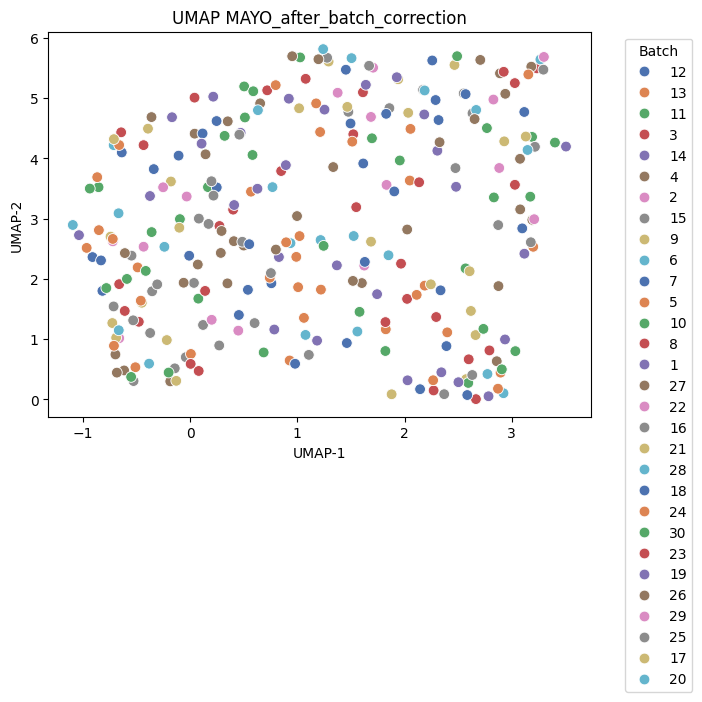

In [ ]:
plot(data_combat, metadata, plot_type='umap', name='MSBB_after_batch_correction')

In [ ]:
data_combat.to_csv("./AMP_AD_datasets/ROSMAP_counts1_v3.csv")

In [3]:
# The design matric is singular or not??

import numpy as np
import pandas as pd

metadata = pd.read_csv('metadata_merged.csv', index_col='specimenID')
metadata = metadata[(metadata['study'] == 'MSBB')]

# Encoding the categorical data
metadata_encoded = pd.get_dummies(metadata[['sex', 'diagnosis']], drop_first=True)

# Checking the rank of the matrix
rank = np.linalg.matrix_rank(metadata_encoded.values)

print("Rank of the matrix:", rank)
print("Shape of the matrix:", metadata_encoded.shape)

# Determine if the matrix is singular or non-singular
if rank < min(metadata_encoded.shape):
    print("The matrix is singular.")
else:
    print("The matrix is non-singular.")


Rank of the matrix: 2
Shape of the matrix: (862, 2)
The matrix is non-singular.


# ML model (RF) -- baseline

## Imbalanced dataset

### 1. Without clinical vars

In [ ]:
# code for rosmap/correct! 

print("Imbalance dataset, no clinical vars")

# Creating the modeling dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import cross_validate, RandomizedSearchCV


metadata_path = 'metadata_merged.csv'  # This seems to be the same as dataset_path, double-check if this is correct
df_metadata = pd.read_csv(metadata_path, index_col=0)
df_metadata = df_metadata[(df_metadata['study'] == 'ROSMAP')]


# Load the dataset and metadata
dataset_path = './AMP_AD_datasets/ROSMAP_v2_samples.csv'
df_features = pd.read_csv(dataset_path, index_col=0)
# Align and reorder df_features to match the index order of df_metadata
df_features = df_features.loc[df_metadata.index]



# Select features and target
X = df_features
y = df_metadata['diagnosis']


# Initialize the random forest model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the parameter grid for random search
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=10, scoring='roc_auc', random_state=42, n_jobs=9)
random_search.fit(X, y)

# Print the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Perform cross-validation with the best parameters
rf_best = random_search.best_estimator_
cv_results = cross_validate(rf_best, X, y, cv=10, scoring=['recall', 'f1', 'accuracy', 'precision', 'roc_auc'])

# Print the cross-validation results for each metric
scoring_metrics = ['recall', 'f1', 'accuracy', 'precision', 'roc_auc']
for metric in scoring_metrics:
    print(f"Mean CV {metric}: {cv_results['test_' + metric].mean()}\n")
    




### 2. With clinical vars

In [ ]:
# With onehotencoder (July 2024)

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder

# Load the gene expression data
dataset_path = './AMP_AD_datasets/ROSMAP_counts_v4.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file
metadata_path = 'backup/metadata_v3.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)
df_metadata = df_metadata[(df_metadata['study'] == 'ROSMAP')]

# Drop the unnecessary columns from the metadata
df_metadata = df_metadata.drop(columns=['individualID', 'race', 'spanish', 'pmi', "RIN", 'study', 'ethnicity','AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED',
       'RnaSeqMetrics_PCT_INTRONIC_BASES',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES',
       'ethnicity', 'study', 'batch'], errors='ignore')

# Merge the metadata with the gene expression data based on the SpecimenID and index
df_merged = df_features.merge(df_metadata, left_on=df_features.index, right_on='specimenID', how='left')

# Select the 'diagnosis' column as the target variable 'y'
y = df_merged['diagnosis']

# Drop the target variable and 'specimenID' from the merged dataframe to get the features 'X'
X = df_merged.drop(columns=['diagnosis', 'specimenID'])

# One-hot encode the categorical variables
categorical_features = ['tissue', 'apoe4_allele', 'sex']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=False)

# Check the target distribution
print(y.value_counts(normalize=True))



diagnosis
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
X_encoded

ENSG00000000003  ENSG00000000419  ENSG00000000457  ENSG00000000460  \
0            2.693056         4.008124         3.843684         1.891460   
1            2.952038         4.146917         3.819310         1.672045   
2            2.935881         4.394735         4.399317         1.909150   
3            3.970723         3.811088         3.519447         1.613139   
4            3.555162         3.863562         3.737334         2.403238   
...               ...              ...              ...              ...   
1225         3.997896         3.664660         3.606317         1.843396   
1226         3.838267         4.284751         3.479254         1.436041   
1227         3.460458         4.213021         3.716468         1.841433   
1228         4.105213         4.121475         3.380223         1.784129   
1229         3.824680         3.666909         4.118963         2.021738   

      ENSG00000000938  ENSG00000000971  ENSG00000001036  ENSG00000001084  \
0            2.131878         5.089801         2.564877         4.163159   
1            1.707203         3.071029         3.198746         5.275337   
2            1.711887         3.485700         3.305756         5.022003   
3            3.515993         4.746188         3.800684         5.696683   
4            4.053856         5.039985         3.336166         5.500272   
...               ...              ...              ...              ...   
1225         2.878161         4.424131         3.779642         5.042640   
1226         2.456957         4.752588         3.992392         5.895573   
1227         4.239843         5.375558         3.510389         4.671199   
1228         3.340700         5.475074         3.553546         6.069121   
1229         3.589903         4.072199         3.471198         5.371579   

      ENSG00000001167  ENSG00000001460  ...   RIN2  age_death  tissue_1  \
0            4.105802         4.275373  ...  47.61  72.720055     False   
1            4.577458         4.262465  ...  70.56  81.111567     False   
2            4.313655         4.688572  ...  50.41  80.906229     False   
3            4.843922         3.624694  ...  50.41  87.753593     False   
4            4.573848         4.143737  ...  54.76  90.000000     False   
...               ...              ...  ...    ...        ...       ...   
1225         4.917630         3.775050  ...  23.04  90.000000     False   
1226         4.736819         3.575024  ...  68.89  87.200548      True   
1227         4.571667         3.160345  ...  62.41  84.752909     False   
1228         4.703217         3.542863  ...  68.89  90.000000      True   
1229         4.653651         3.635379  ...  40.96  67.370294     False   

      tissue_3  tissue_6  apoe4_allele_0  apoe4_allele_1  apoe4_allele_2  \
0         True     False            True           False           False   
1         True     False            True           False           False   
2         True     False            True           False           False   
3         True     False            True           False           False   
4         True     False           False            True           False   
...        ...       ...             ...             ...             ...   
1225      True     False            True           False           False   
1226     False     False            True           False           False   
1227      True     False            True           False           False   
1228     False     False            True           False           False   
1229      True     False            True           False           False   

      sex_0  sex_1  
0      True  False  
1      True  False  
2     False   True  
3      True  False  
4     False   True  
...     ...    ...  
1225  False   True  
1226  False   True  
1227  False   True  
1228  False   True  
1229   True  False  

[1230 rows x 17009 columns]

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import cross_validate, RandomizedSearchCV

# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for random search
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=10, scoring='roc_auc', random_state=42, n_jobs=2)
random_search.fit(X_encoded, y)

# Print the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Perform cross-validation with the best parameters
rf_best = random_search.best_estimator_
cv_results = cross_validate(rf_best, X_encoded, y, cv=10, scoring=['recall', 'f1', 'accuracy', 'precision', 'roc_auc'])

# Print the cross-validation results for each metric
scoring_metrics = ['recall', 'f1', 'accuracy', 'precision', 'roc_auc']
for metric in scoring_metrics:
    print(f"Mean CV {metric}: {cv_results['test_' + metric].mean()}\n")

## Random oversampled dataset (were not used)

### 1. Without clinical vars

In [ ]:
# Load the dataset and metadata
dataset_path = '/home/vmottaqi/rnaseq_synapse/backup/ROSMAP_counts_v6.csv'
df_features = pd.read_csv(dataset_path, index_col=0)
df_features

ENSG00000000003  ENSG00000000419  \
sample_index                                                            
487_120515                                  2.693056         4.008124   
182_120424                                  2.952038         4.146917   
193_120424                                  2.935881         4.394735   
694_120605                                  3.970723         3.811088   
366_120502                                  3.555162         3.863562   
...                                              ...              ...   
Sample_R3633816-DLPFC_generated_275         3.997896         3.664660   
Sample_R4841941-AC_generated_276            3.838267         4.284751   
152_120419_generated_277                    3.460458         4.213021   
Sample_R9598418-AC_generated_278            4.105213         4.121475   
174_120424_generated_279                    3.824680         3.666909   

                                     ENSG00000000457  ENSG00000000460  \
sample_index                                                            
487_120515                                  3.843684         1.891460   
182_120424                                  3.819310         1.672045   
193_120424                                  4.399317         1.909150   
694_120605                                  3.519447         1.613139   
366_120502                                  3.737334         2.403238   
...                                              ...              ...   
Sample_R3633816-DLPFC_generated_275         3.606317         1.843396   
Sample_R4841941-AC_generated_276            3.479254         1.436041   
152_120419_generated_277                    3.716468         1.841433   
Sample_R9598418-AC_generated_278            3.380223         1.784129   
174_120424_generated_279                    4.118963         2.021738   

                                     ENSG00000000938  ENSG00000000971  \
sample_index                                                            
487_120515                                  2.131878         5.089801   
182_120424                                  1.707203         3.071029   
193_120424                                  1.711887         3.485700   
694_120605                                  3.515993         4.746188   
366_120502                                  4.053856         5.039985   
...                                              ...              ...   
Sample_R3633816-DLPFC_generated_275         2.878161         4.424131   
Sample_R4841941-AC_generated_276            2.456957         4.752588   
152_120419_generated_277                    4.239843         5.375558   
Sample_R9598418-AC_generated_278            3.340700         5.475074   
174_120424_generated_279                    3.589903         4.072199   

                                     ENSG00000001036  ENSG00000001084  \
sample_index                                                            
487_120515                                  2.564877         4.163159   
182_120424                                  3.198746         5.275337   
193_120424                                  3.305756         5.022003   
694_120605                                  3.800684         5.696683   
366_120502                                  3.336166         5.500272   
...                                              ...              ...   
Sample_R3633816-DLPFC_generated_275         3.779642         5.042640   
Sample_R4841941-AC_generated_276            3.992392         5.895573   
152_120419_generated_277                    3.510389         4.671199   
Sample_R9598418-AC_generated_278            3.553546         6.069121   
174_120424_generated_279                    3.471198         5.371579   

                                     ENSG00000001167  ENSG00000001460  ...  \
sample_index                                                           ...   
487_120515                                  4.105802         4.275373  ...   
182

In [ ]:
metadata_path = 'backup/metadata_v6_rosmap.csv'  # This seems to be the same as dataset_path, double-check if this is correct
df_metadata = pd.read_csv(metadata_path, index_col=0)
df_metadata

individualID  diagnosis  tissue  race  \
specimenID                                                                  
487_120515                              R9904978          0       3   1.0   
182_120424                              R9818080          0       3   1.0   
193_120424                              R9817161          1       3   1.0   
694_120605                              R9817056          0       3   1.0   
366_120502                              R9809661          1       3   1.0   
...                                          ...        ...     ...   ...   
Sample_R3633816-DLPFC_generated_275     R3633816          0       3   1.0   
Sample_R4841941-AC_generated_276        R4841941          0       1   1.0   
152_120419_generated_277                R6231758          0       3   1.0   
Sample_R9598418-AC_generated_278        R9598418          0       1   1.0   
174_120424_generated_279                R7347788          0       3   1.0   

                                     spanish  apoe4_allele  sex  batch  \
specimenID                                                               
487_120515                               2.0             0    0      4   
182_120424                               2.0             0    0      7   
193_120424                               2.0             0    1      4   
694_120605                               2.0             0    0      4   
366_120502                               2.0             1    1      7   
...                                      ...           ...  ...    ...   
Sample_R3633816-DLPFC_generated_275      2.0             0    1     13   
Sample_R4841941-AC_generated_276         2.0             0    1     13   
152_120419_generated_277                 2.0             0    1      7   
Sample_R9598418-AC_generated_278         2.0             0    1     13   
174_120424_generated_279                 2.0             0    0      6   

                                           pmi  RIN   RIN2  age_death  \
specimenID                                                              
487_120515                           12.433333  6.9  47.61  72.720055   
182_120424                           16.000000  8.4  70.56  81.111567   
193_120424                            1.750000  7.1  50.41  80.906229   
694_120605                            6.416667  7.1  50.41  87.753593   
366_120502                           17.416667  7.4  54.76  90.000000   
...                                        ...  ...    ...        ...   
Sample_R3633816-DLPFC_generated_275  10.000000  4.8  23.04  90.000000   
Sample_R4841941-AC_generated_276      4.566667  8.3  68.89  87.200548   
152_120419_generated_277              5.750000  7.9  62.41  84.752909   
Sample_R9598418-AC_generated_278      4.750000  8.3  68.89  90.000000   
174_120424_generated_279              5.000000  6.4  40.96  67.370294   

                                     AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED  \
specimenID                                                                          
487_120515                                                               0.931411   
182_120424                                                               0.944450   
193_120424                                                               0.958718   
694_120605                                                               0.960609   
366_120502                                                               0.931962   
...                                                                           ...   
Sample_R3633816-DLPFC_generated_275                                      0.972683   
Sample_R4841941-AC_generated_276                                         0.931253   
152_120419_generated_277                                                 0.931772   
Sample_R9598418-AC_generated_278                                         0.971104   
174_120424_generated_279                                                 0.960993   

               

In [ ]:
# Creating the modeling dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset and metadata
dataset_path = '/home/vmottaqi/rnaseq_synapse/backup/ROSMAP_counts_v6.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

metadata_path = 'backup/metadata_v6_rosmap.csv'  # This seems to be the same as dataset_path, double-check if this is correct
df_metadata = pd.read_csv(metadata_path, index_col=0)

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Select features and target
X = df_features
y = df_metadata['diagnosis']


In [ ]:
from scipy.stats import randint
from sklearn.model_selection import cross_validate, RandomizedSearchCV

# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for random search
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=10, scoring='roc_auc', random_state=42, n_jobs=2)
random_search.fit(X, y)

# Print the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Perform cross-validation with the best parameters
rf_best = random_search.best_estimator_
cv_results = cross_validate(rf_best, X, y, cv=10, scoring=['recall', 'f1', 'accuracy', 'precision', 'roc_auc'])

# Print the cross-validation results for each metric
scoring_metrics = ['recall', 'f1', 'accuracy', 'precision', 'roc_auc']
for metric in scoring_metrics:
    print(f"Mean CV {metric}: {cv_results['test_' + metric].mean()}\n")

KeyboardInterrupt: 

### 2. With clinical vars

In [ ]:
# With onehotencoder (July 2024)

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder

# Load the gene expression data
dataset_path = 'backup/ROSMAP_counts_v6.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file
metadata_path = 'backup/metadata_v6_rosmap.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Drop the unnecessary columns from the metadata
df_metadata = df_metadata.drop(columns=['individualID', 'race', 'spanish', 'pmi', "RIN", 'study', 'ethnicity','AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED',
       'RnaSeqMetrics_PCT_INTRONIC_BASES',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES',
       'ethnicity', 'study', 'batch'], errors='ignore')

# Merge the metadata with the gene expression data based on the SpecimenID and index
df_merged = df_features.merge(df_metadata, left_on=df_features.index, right_on='specimenID', how='left')

# Select the 'diagnosis' column as the target variable 'y'
y = df_merged['diagnosis']

# Drop the target variable and 'specimenID' from the merged dataframe to get the features 'X'
X = df_merged.drop(columns=['diagnosis', 'specimenID'])

# One-hot encode the categorical variables
categorical_features = ['tissue', 'apoe4_allele', 'sex']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=False)

# Check the target distribution
print(y.value_counts(normalize=True))



diagnosis
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
X_encoded

ENSG00000000003  ENSG00000000419  ENSG00000000457  ENSG00000000460  \
0            2.693056         4.008124         3.843684         1.891460   
1            2.952038         4.146917         3.819310         1.672045   
2            2.935881         4.394735         4.399317         1.909150   
3            3.970723         3.811088         3.519447         1.613139   
4            3.555162         3.863562         3.737334         2.403238   
...               ...              ...              ...              ...   
1225         3.997896         3.664660         3.606317         1.843396   
1226         3.838267         4.284751         3.479254         1.436041   
1227         3.460458         4.213021         3.716468         1.841433   
1228         4.105213         4.121475         3.380223         1.784129   
1229         3.824680         3.666909         4.118963         2.021738   

      ENSG00000000938  ENSG00000000971  ENSG00000001036  ENSG00000001084  \
0            2.131878         5.089801         2.564877         4.163159   
1            1.707203         3.071029         3.198746         5.275337   
2            1.711887         3.485700         3.305756         5.022003   
3            3.515993         4.746188         3.800684         5.696683   
4            4.053856         5.039985         3.336166         5.500272   
...               ...              ...              ...              ...   
1225         2.878161         4.424131         3.779642         5.042640   
1226         2.456957         4.752588         3.992392         5.895573   
1227         4.239843         5.375558         3.510389         4.671199   
1228         3.340700         5.475074         3.553546         6.069121   
1229         3.589903         4.072199         3.471198         5.371579   

      ENSG00000001167  ENSG00000001460  ...   RIN2  age_death  tissue_1  \
0            4.105802         4.275373  ...  47.61  72.720055     False   
1            4.577458         4.262465  ...  70.56  81.111567     False   
2            4.313655         4.688572  ...  50.41  80.906229     False   
3            4.843922         3.624694  ...  50.41  87.753593     False   
4            4.573848         4.143737  ...  54.76  90.000000     False   
...               ...              ...  ...    ...        ...       ...   
1225         4.917630         3.775050  ...  23.04  90.000000     False   
1226         4.736819         3.575024  ...  68.89  87.200548      True   
1227         4.571667         3.160345  ...  62.41  84.752909     False   
1228         4.703217         3.542863  ...  68.89  90.000000      True   
1229         4.653651         3.635379  ...  40.96  67.370294     False   

      tissue_3  tissue_6  apoe4_allele_0  apoe4_allele_1  apoe4_allele_2  \
0         True     False            True           False           False   
1         True     False            True           False           False   
2         True     False            True           False           False   
3         True     False            True           False           False   
4         True     False           False            True           False   
...        ...       ...             ...             ...             ...   
1225      True     False            True           False           False   
1226     False     False            True           False           False   
1227      True     False            True           False           False   
1228     False     False            True           False           False   
1229      True     False            True           False           False   

      sex_0  sex_1  
0      True  False  
1      True  False  
2     False   True  
3      True  False  
4     False   True  
...     ...    ...  
1225  False   True  
1226  False   True  
1227  False   True  
1228  False   True  
1229   True  False  

[1230 rows x 17009 columns]

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import cross_validate, RandomizedSearchCV

# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for random search
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=10, scoring='roc_auc', random_state=42, n_jobs=2)
random_search.fit(X_encoded, y)

# Print the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Perform cross-validation with the best parameters
rf_best = random_search.best_estimator_
cv_results = cross_validate(rf_best, X_encoded, y, cv=10, scoring=['recall', 'f1', 'accuracy', 'precision', 'roc_auc'])

# Print the cross-validation results for each metric
scoring_metrics = ['recall', 'f1', 'accuracy', 'precision', 'roc_auc']
for metric in scoring_metrics:
    print(f"Mean CV {metric}: {cv_results['test_' + metric].mean()}\n")

# Merging three datasets and Select genes set using MAD

## 1. Merging

In [101]:
import pandas as pd

# Load the datasets
df1 = pd.read_csv('./AMP_AD_datasets/ROSMAP_v2_samples.csv', index_col=0)
df2 = pd.read_csv('./AMP_AD_datasets/MSBB_v2_samples.csv', index_col=0)
df3 = pd.read_csv('./AMP_AD_datasets/Mayo_v2_samples.csv', index_col=0)

# Concatenate the datasets
# Assuming all datasets have the same columns (genes) and the rows (samples) need to be merged
# combined_df = pd.concat([df1, df2, df3], axis=0)

# If you need to ensure that the genes align correctly and are consistent across datasets, you could also include:
combined_df = pd.concat([df1, df2, df3], axis=0, join='inner')

# Check the combined DataFrame
combined_df.shape

(2105, 15302)

In [109]:
combined_df

TSPAN6      DPM1     SCYL3     FIRRM       FGR       CFH  \
specimenID                                                               
487_120515 -1.311624  0.198351  0.459366 -0.130345 -0.595326  0.213454   
182_120424 -1.142552  0.223985  0.388770 -0.392290 -0.865868 -1.848168   
193_120424 -1.098726  0.310779  0.890378 -0.144169 -0.920858 -1.445022   
694_120605 -0.274357  0.032824  0.248784 -0.431776  0.467455 -0.468727   
366_120502 -0.618033  0.084906  0.357523  0.216940  0.752710 -0.303869   
...              ...       ...       ...       ...       ...       ...   
948_CBE    -0.426868 -0.104909  0.008333 -0.678367 -0.331839  0.131425   
952_CBE    -0.511010 -0.196173 -0.537725 -1.452138  0.469393 -2.132757   
966_CBE    -0.025363 -0.000323  0.003503  0.243032 -0.633469  0.034772   
976_CBE     0.672469 -0.035666  0.233930  0.217314  0.505145  0.679639   
991_CBE     0.888483  0.044687 -0.333468 -0.115190  0.368081  0.691629   

               FUCA2      GCLC      NFYA     STPG1  ...     RENO1  \
specimenID                                          ...             
487_120515 -1.238362 -1.728809 -0.548562  0.509772  ...  0.662136   
182_120424 -0.723939 -0.542297 -0.228433  0.482190  ... -0.048871   
193_120424 -0.667666 -0.779523 -0.414912  0.650459  ... -0.208040   
694_120605 -0.318939 -0.098791 -0.107479  0.156766  ... -0.400270   
366_120502 -0.604859 -0.287414 -0.233574  0.435989  ... -0.470331   
...              ...       ...       ...       ...  ...       ...   
948_CBE     0.212101 -0.070641  0.047432  0.236184  ... -0.522347   
952_CBE    -0.703451 -0.848650 -0.519402  0.363786  ...  0.858857   
966_CBE    -0.310798 -0.079054  0.203078  0.026697  ...  0.280892   
976_CBE     0.146305  0.296122 -0.151400 -0.156085  ... -0.457740   
991_CBE     0.033943  0.370386 -0.030560 -0.118024  ...  0.223740   

            LOC105376030  LOC107986626  LOC102724289  LINC03026  LOC124902204  \
specimenID                                                                      
487_120515      1.194861     -0.334757      0.137462   0.108735      0.484869   
182_120424      1.534010      0.574645     -0.322134  -0.450281      0.719957   
193_120424      1.039052      0.539163     -0.148980  -1.037118      0.550380   
694_120605      0.654342      0.367132      0.265392  -1.404352      0.695118   
366_120502      1.440713     -0.662369     -0.756617  -1.037525      0.043755   
...                  ...           ...           ...        ...           ...   
948_CBE         0.532042      0.456984     -0.103929   0.666553      0.193082   
952_CBE        -0.281561      0.084446      0.311883   0.250254     -0.249922   
966_CBE        -0.187527      0.326858      0.498738  -0.556654     -0.165566   
976_CBE         0.517132     -0.191756      0.036250   0.008297     -0.350369   
991_CBE        -1.857678     -0.559610      0.174379  -0.293122     -0.367931   

            LOC107986742  LOC283045  LOC105377224  LOC101929748  
specimenID                                                       
487_120515      1.437143   0.318347     -0.517982     -0.034570  
182_120424      1.119835   0.232768      0.684921      0.110800  
193_120424      0.794598   0.346907      0.159491      0.197251  
694_120605     -0.187372   0.114395     -0.484565     -0.019248  
366_120502      0.513285   0.094453      0.398065      0.133158  
...                  ...        ...           ...           ...  
948_CBE         0.279276   0.172546     -1.416390     -0.101523  
952_CBE         0.854351  -0.965282     -1.601522      1.230199  
966_CBE        -0.595309   0.576540     -1.312718      0.224004  
976_CBE        -0.226253  -0.103642     -1.281930     -0.624040  
991_CBE        -0.241495  -1.042724     -0.350711      0.139999  

[2105 rows x 15302 columns]

In [110]:
combined_df.to_csv('rnaseq_merged_13k.csv')

## 2. Check

In [14]:
import pandas as pd
dataset_path = 'rnaseq_merged_13k.csv'
df = pd.read_csv(dataset_path, index_col=0)
df

TSPAN6      DPM1     SCYL3     FIRRM       FGR       CFH  \
specimenID                                                               
487_120515 -1.311624  0.198351  0.459366 -0.130345 -0.595326  0.213454   
182_120424 -1.142552  0.223985  0.388770 -0.392290 -0.865868 -1.848168   
193_120424 -1.098726  0.310779  0.890378 -0.144169 -0.920858 -1.445022   
694_120605 -0.274357  0.032824  0.248784 -0.431776  0.467455 -0.468727   
366_120502 -0.618033  0.084906  0.357523  0.216940  0.752710 -0.303869   
...              ...       ...       ...       ...       ...       ...   
948_CBE    -0.426868 -0.104909  0.008333 -0.678367 -0.331839  0.131425   
952_CBE    -0.511010 -0.196173 -0.537725 -1.452138  0.469393 -2.132757   
966_CBE    -0.025363 -0.000323  0.003503  0.243032 -0.633469  0.034772   
976_CBE     0.672469 -0.035666  0.233930  0.217314  0.505145  0.679639   
991_CBE     0.888483  0.044687 -0.333468 -0.115190  0.368081  0.691629   

               FUCA2      GCLC      NFYA     STPG1  ...     RENO1  \
specimenID                                          ...             
487_120515 -1.238362 -1.728809 -0.548562  0.509772  ...  0.662136   
182_120424 -0.723939 -0.542297 -0.228433  0.482190  ... -0.048871   
193_120424 -0.667666 -0.779523 -0.414912  0.650459  ... -0.208040   
694_120605 -0.318939 -0.098791 -0.107479  0.156766  ... -0.400270   
366_120502 -0.604859 -0.287414 -0.233574  0.435989  ... -0.470331   
...              ...       ...       ...       ...  ...       ...   
948_CBE     0.212101 -0.070641  0.047432  0.236184  ... -0.522347   
952_CBE    -0.703451 -0.848650 -0.519402  0.363786  ...  0.858857   
966_CBE    -0.310798 -0.079054  0.203078  0.026697  ...  0.280892   
976_CBE     0.146305  0.296122 -0.151400 -0.156085  ... -0.457740   
991_CBE     0.033943  0.370386 -0.030560 -0.118024  ...  0.223740   

            LOC105376030  LOC107986626  LOC102724289  LINC03026  LOC124902204  \
specimenID                                                                      
487_120515      1.194861     -0.334757      0.137462   0.108735      0.484869   
182_120424      1.534010      0.574645     -0.322134  -0.450281      0.719957   
193_120424      1.039052      0.539163     -0.148980  -1.037118      0.550380   
694_120605      0.654342      0.367132      0.265392  -1.404352      0.695118   
366_120502      1.440713     -0.662369     -0.756617  -1.037525      0.043755   
...                  ...           ...           ...        ...           ...   
948_CBE         0.532042      0.456984     -0.103929   0.666553      0.193082   
952_CBE        -0.281561      0.084446      0.311883   0.250254     -0.249922   
966_CBE        -0.187527      0.326858      0.498738  -0.556654     -0.165566   
976_CBE         0.517132     -0.191756      0.036250   0.008297     -0.350369   
991_CBE        -1.857678     -0.559610      0.174379  -0.293122     -0.367931   

            LOC107986742  LOC283045  LOC105377224  LOC101929748  
specimenID                                                       
487_120515      1.437143   0.318347     -0.517982     -0.034570  
182_120424      1.119835   0.232768      0.684921      0.110800  
193_120424      0.794598   0.346907      0.159491      0.197251  
694_120605     -0.187372   0.114395     -0.484565     -0.019248  
366_120502      0.513285   0.094453      0.398065      0.133158  
...                  ...        ...           ...           ...  
948_CBE         0.279276   0.172546     -1.416390     -0.101523  
952_CBE         0.854351  -0.965282     -1.601522      1.230199  
966_CBE        -0.595309   0.576540     -1.312718      0.224004  
976_CBE        -0.226253  -0.103642     -1.281930     -0.624040  
991_CBE        -0.241495  -1.042724     -0.350711      0.139999  

[2105 rows x 15302 columns]

In [112]:
# Check for NULL values in the dataset
null_values_exist = df.isnull().any().any()

if null_values_exist:
    print("There are NULL values in the dataset.")
else:
    print("There are no NULL values in the dataset.")

There are no NULL values in the dataset.


In [15]:
import pandas as pd
from statsmodels.robust.scale import mad

# Calculate the Median Absolute Deviation (MAD) for each gene (column)
mad_values = df.apply(mad, axis=0)

# Rank the genes based on MAD values from most variable to least variable
ranked_genes = mad_values.sort_values(ascending=False).index.tolist()

# Select the top 4000 most variable genes
most_variable_genes = ranked_genes[:4000]

# Print the ranked list of genes
# print("Ranked genes from most variable to least variable:")
# print(ranked_genes)
print('Top 4000 most variable genes:')
print(most_variable_genes)


Top 4000 most variable genes:
['GSTM1', 'CARTPT', 'MIR3976HG', 'LINC02263', 'PVALB', 'LINC00507', 'LINC01164', 'CTXN3', 'ROS1', 'SLC27A6', 'LINC01007', 'POSTN', 'LINC00898', 'GPR26', 'MEPE', 'SLC17A6', 'PENK', 'DNAJC5G', 'MAS1', 'C6orf141', 'RTP1', 'LNCBRM', 'PTGER3', 'SERPINA5', 'KLK7', 'LOC124902301', 'HSPB3', 'PCSK1', 'FREM3', 'LOC124900989', 'CBLN4', 'CBLN2', 'LOC105369302', 'PART1', 'TRIM54', 'TNNT2', 'MME', 'CNGB1', 'ASB2', 'TDO2', 'BMP3', 'TYRP1', 'EPIC1', 'LINC02714', 'CCK', 'INSRR', 'LINC00326', 'LINC02607', 'FGF5', 'TESPA1', 'MT1H', 'PNMA5', 'PKD2L1', 'SOSTDC1', 'LOC105371672', 'SMIM43', 'ONECUT2', 'TMEM233', 'SMPX', 'KCNS1', 'SMYD1', 'SCARA5', 'GPR55', 'HTR3B', 'CRNDE', 'KRT17', 'NEUROD6', 'DRGX', 'RXFP1', 'PTH2R', 'GDA', 'MCHR2', 'FBXO40', 'IQGAP3', 'SLCO4C1', 'LOC124900848', 'MET', 'CHGA', 'LINC01511', 'NGB', 'MSC', 'LTF', 'THSD4-AS1', 'KLHL14', 'SERTM1', 'LOC101929237', 'SV2C', 'ATP4A', 'LCN15', 'PCP4', 'LINC02217', 'COL5A2', 'CALB1', 'LINC02552', 'NOS2', 'CERKL', 'HTR2C'

In [16]:
for i in most_variable_genes:
    print(i)

GSTM1
CARTPT
MIR3976HG
LINC02263
PVALB
LINC00507
LINC01164
CTXN3
ROS1
SLC27A6
LINC01007
POSTN
LINC00898
GPR26
MEPE
SLC17A6
PENK
DNAJC5G
MAS1
C6orf141
RTP1
LNCBRM
PTGER3
SERPINA5
KLK7
LOC124902301
HSPB3
PCSK1
FREM3
LOC124900989
CBLN4
CBLN2
LOC105369302
PART1
TRIM54
TNNT2
MME
CNGB1
ASB2
TDO2
BMP3
TYRP1
EPIC1
LINC02714
CCK
INSRR
LINC00326
LINC02607
FGF5
TESPA1
MT1H
PNMA5
PKD2L1
SOSTDC1
LOC105371672
SMIM43
ONECUT2
TMEM233
SMPX
KCNS1
SMYD1
SCARA5
GPR55
HTR3B
CRNDE
KRT17
NEUROD6
DRGX
RXFP1
PTH2R
GDA
MCHR2
FBXO40
IQGAP3
SLCO4C1
LOC124900848
MET
CHGA
LINC01511
NGB
MSC
LTF
THSD4-AS1
KLHL14
SERTM1
LOC101929237
SV2C
ATP4A
LCN15
PCP4
LINC02217
COL5A2
CALB1
LINC02552
NOS2
CERKL
HTR2C
RGS4
DPP4
OBSCN-AS1
WNT2
PRSS16
HTR1A
KCNH5
LINC01821
ADAMTS2
MSC-AS1
PTPN3
GLP2R
KCNC2
LINC01361
OTOGL
SST
SERPINA3
UMODL1-AS1
FAM163A
LAMC2
ABCC12
TAC1
SP8
KCNV1
SLC17A8
DYDC2
CNIH3-AS2
HSPA6
THEMIS
SOHLH1
CFAP157
GLRA3
LINC02009
CRABP1
SCRT2
LINC02458
PRLR
MAPK15
FOXJ1
VWA3B
GDF7
ANKRD34C
LINC03025
HS3ST3B1
AQP1
COL

## 3. Removing least vareiable genes from dataset

In [119]:
import pandas as pd
from statsmodels.robust.scale import mad

# Load your data
dataset_path = 'rnaseq_merged_13k.csv'
df = pd.read_csv(dataset_path, index_col=0)

# Calculate the Median Absolute Deviation (MAD) for each gene (column)
mad_values = df.apply(mad, axis=0)

# Rank the genes based on MAD values from most variable to least variable
ranked_genes = mad_values.sort_values(ascending=False).index.tolist()

# Select the top 4000 most variable genes
most_variable_genes = ranked_genes[:5000]

# Print the ranked list of genes
# print("Ranked genes from most variable to least variable:")
# print(ranked_genes)
# print('Top 4000 most variable genes:')
# print(most_variable_genes)

# Filter the DataFrame to keep only the top 4000 most variable genes
df_filtered = df[most_variable_genes]

# Save the filtered DataFrame to a new CSV file
new_csv_file_path = 'rnaseq_merged_5k.csv'
df_filtered.to_csv(new_csv_file_path)


## Creating a subset of the dataset (30 genes) for refrence RF SHAP

In [129]:
import pandas as pd
dataset_path = 'rnaseq_merged_4k.csv'
df = pd.read_csv(dataset_path, index_col=0)
df

GSTM1    CARTPT  MIR3976HG  LINC02263     PVALB  LINC00507  \
specimenID                                                                  
487_120515 -4.215604  6.834142   6.178734   6.555866  4.856445   7.831509   
182_120424  2.902852  5.157342   7.094175   5.924674  6.263663   8.437083   
193_120424 -3.402193  4.849398   7.094800   5.939845  6.501796   8.088912   
694_120605 -4.469664  6.151414   5.166871   5.443188  5.560515   7.370465   
366_120502 -4.994719  5.015698   6.056921   5.746971  6.019998   7.071019   
...              ...       ...        ...        ...       ...        ...   
948_CBE     4.779911  0.025510  -1.067538   0.333340  0.762264   0.326262   
952_CBE     4.530400  0.555883   0.859679   1.197493 -1.234499   1.107166   
966_CBE    -3.710754 -0.767803   0.639294  -0.151353  0.363360  -0.204887   
976_CBE     3.874152 -0.985721   0.014551  -0.477939  0.389962  -0.495025   
991_CBE    -3.187829 -2.072641   0.175414  -1.775438 -1.591261  -1.690107   

            LINC01164     CTXN3      ROS1   SLC27A6  ...      GJB6  \
specimenID                                           ...             
487_120515   4.483629  3.432894  6.824918 -3.036709  ... -1.417878   
182_120424   4.790683  2.861614  6.973495 -2.158723  ... -0.741176   
193_120424   2.816889  3.886240  7.412702 -2.177538  ... -0.220137   
694_120605   4.471827  3.708951  6.590063 -3.024838  ...  0.826478   
366_120502   4.509049  3.588866  6.567034 -0.539881  ...  0.145006   
...               ...       ...       ...       ...  ...       ...   
948_CBE     -0.115518  0.674526  0.905000  0.027038  ...  0.617121   
952_CBE      0.956896 -0.215652 -2.240459 -1.074461  ...  0.256908   
966_CBE     -0.042946  0.857091  0.115620 -0.182272  ... -1.293296   
976_CBE     -0.410030  0.181349  1.008840  0.034714  ...  1.428469   
991_CBE      0.597610 -0.830749 -1.646863  1.046305  ...  0.954320   

            CCDC183-AS1     KLF15    AGTRAP       EZR   C2orf15      LMO2  \
specimenID                                                                  
487_120515    -0.128854 -0.991358 -0.134333 -1.346299 -0.203132 -0.361049   
182_120424    -0.082751 -1.461532 -1.169341 -1.787786 -0.176853 -0.845553   
193_120424     0.142969 -0.912734 -0.928884 -1.827439  0.256416 -1.471749   
694_120605    -0.343648 -0.176299 -0.011934 -0.885205 -0.466244 -0.560324   
366_120502    -0.640399 -0.431863 -0.471121 -0.415752 -0.067176 -0.603857   
...                 ...       ...       ...       ...       ...       ...   
948_CBE       -0.068350 -0.269344 -0.285384  0.112951  0.185235  0.047112   
952_CBE        0.127422  0.726984  0.503750 -0.287588  0.482036 -0.236053   
966_CBE        0.144738 -0.111573 -0.673554 -0.109557  0.028737 -0.019497   
976_CBE        0.039048  0.245234  0.473145  0.641205 -0.263325 -0.356584   
991_CBE       -0.058912  0.900901  1.207116  0.663053 -0.265018  0.062064   

              GAREM2    ZBTB16      SDSL  
specimenID                                
487_120515 -1.222473  0.744295  0.495347  
182_120424 -1.313598  0.609709  0.030483  
193_120424 -1.199563  0.462192 -0.135029  
694_120605 -1.901833  0.714534  0.763901  
366_120502  0.001819  1.093614 -0.483497  
...              ...       ...       ...  
948_CBE    -0.162410 -1.025559  0.507043  
952_CBE     0.891506 -0.222189 -0.609192  
966_CBE    -0.009188  0.350811 -0.600747  
976_CBE     0.679678  0.600495 -0.010185  
991_CBE     1.075534  0.973638 -0.098284  

[2105 rows x 4000 columns]

In [126]:
import pandas as pd

# Assuming your DataFrame is already loaded
# df = pd.read_csv('your_dataset.csv')

# Updated list of AD associated genes
ad_genes = [
    'APOE', 'APP', 'PSEN1', 'PSEN2', 'TREM2', 'BIN1', 'SORL1', 'CLU', 'ABCA7', 'CR1',
    'PICALM', 'CD33', 'MS4A', 'CD2AP', 'ADAM10', 'MAPT', 'EZH2', 'PLD3', 'SLC24A4', 
    'FERMT2', 'EPHA1', 'GRN', 'BACE1', 'NICA', 'GSK3B', 'NCSTN', 'ANPEP', 'CASS4', 
    'SORCS1', 'CELF1', 'LRP1', 'APOC1', 'APOJ', 'TOMM40', 'LIPA', 'GSTO1', 'GSTO2', 
    'CALHM1', 'CBLC', 'GAB2', 'PTK2B', 'CEACAM1', 'TUBA4A', 'MTHFR', 'HLA-DRB5', 
    'HLA-DRB1', 'INPP5D', 'MEF2C', 'ZCWPW1', 'NME8'
]

# Check which genes from the list are present in the DataFrame columns
genes_present = [gene for gene in ad_genes if gene in df.columns]

# Print the list of genes present in the DataFrame
print("Genes from the list present in the DataFrame columns:")
print(genes_present)


Genes from the list present in the DataFrame columns:
['APOE', 'TREM2', 'CR1', 'CD33', 'SLC24A4', 'ANPEP', 'CASS4', 'APOC1', 'CALHM1', 'PTK2B', 'TUBA4A', 'HLA-DRB5', 'HLA-DRB1', 'INPP5D', 'MEF2C']


In [127]:
ad_genes = ['APOE', 'TREM2', 'CR1', 'CD33', 'SLC24A4', 'ANPEP', 'CASS4', 'APOC1', 'CALHM1', 'PTK2B', 'TUBA4A', 'HLA-DRB5', 'HLA-DRB1', 'INPP5D', 'MEF2C']
regular_genes = ['GSTM1', 'CARTPT', 'MIR3976HG', 'LINC02263', 'PVALB', 'LINC00507', 'LINC01164', 'CTXN3', 'ROS1', 'SLC27A6', 'LINC01007', 'POSTN', 'LINC00898', 'GPR26', 'MEPE']


In [130]:
import pandas as pd

# Assuming your original DataFrame is loaded into 'df'
# df = pd.read_csv('path_to_your_dataset.csv')

# Define the lists of genes you are interested in
ad_genes = ['APOE', 'TREM2', 'CR1', 'CD33', 'SLC24A4', 'ANPEP', 'CASS4', 'APOC1', 'CALHM1', 'PTK2B', 'TUBA4A', 'HLA-DRB5', 'HLA-DRB1', 'INPP5D', 'MEF2C']
regular_genes = ['GSTM1', 'CARTPT', 'MIR3976HG', 'LINC02263', 'PVALB', 'LINC00507', 'LINC01164', 'CTXN3', 'ROS1', 'SLC27A6', 'LINC01007', 'POSTN', 'LINC00898', 'GPR26', 'MEPE']

# Combine both lists
all_genes = ad_genes + regular_genes

# Filter the DataFrame to keep only the columns in your gene lists
filtered_df = df[all_genes]

# Export the filtered DataFrame to a new CSV file
filtered_df.to_csv('rnaseq_subset.csv')

print("Filtered dataset has been saved to 'filtered_dataset.csv'.")


Filtered dataset has been saved to 'filtered_dataset.csv'.


# RF SHAP LOOCV 

## On subset for reference (30 features)

In [ ]:
# Finding the hyperparameters by using 10-fold CV
# will use the hyper parameters later for the RF SHAP

### 1. Finding hyperparameters by 10-fold CV

In [ ]:
# for the subset of the dataset, use the next code!
# add also bootstrap for it


# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from scipy.stats import randint, uniform
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score

# Load the metadata
metadata_path = 'metadata_merged.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Load the dataset
dataset_path = 'rnaseq_merged_4k.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Ensure the feature dataset is aligned and ordered according to the metadata index
df_features = df_features.loc[df_metadata.index]

# Define features and target variable
X = df_features
y = df_metadata['diagnosis']

# Initialize the RandomForestClassifier with balanced class weight
rf = RandomForestClassifier(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 700),
    'max_depth': randint(10, 40),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', 0.08, 0.18, None]  # Range between 10% to 90% of the features
}

# Define a stratified k-fold cross-validation strategy
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Setup RandomizedSearchCV with 100 iterations and 10-fold cross-validation, focusing on F1 score for class 1
f1_scorer = make_scorer(f1_score, average='binary', labels=[1])  # Corrected the average parameter if it's binary classification
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=300, cv=stratified_kfold, scoring=f1_scorer, random_state=42, n_jobs=7)
random_search.fit(X, y)

# Print the best hyperparameters and the best score obtained
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Use the best estimator to perform cross-validation, focusing on multiple metrics for both classes
rf_best = random_search.best_estimator_
cv_results = cross_validate(rf_best, X, y, cv=10, scoring={'f1_Control': make_scorer(f1_score, labels=[0], average='binary'),
                                                           'f1_AD': make_scorer(f1_score, labels=[1], average='binary'),
                                                           'precision_Control': make_scorer(precision_score, labels=[0], average='binary'),
                                                           'precision_AD': make_scorer(precision_score, labels=[1], average='binary'),
                                                           'recall_Control': make_scorer(recall_score, labels=[0], average='binary'),
                                                           'recall_AD': make_scorer(recall_score, labels=[1], average='binary'),
                                                           'roc_auc': 'roc_auc'})


# Print the cross-validation results for each metric for both classes
scoring_metrics = ['f1_Control', 'f1_AD', 'precision_Control', 'precision_AD', 'recall_Control', 'recall_AD', 'roc_auc']
for metric in scoring_metrics:
    print(f"Mean CV {metric}: {cv_results['test_' + metric].mean()}\n")


In [ ]:
# for the small subset of the dataset (30 features)

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from scipy.stats import randint, uniform
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score


# Load the metadata
metadata_path = 'metadata_merged.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Load the dataset
dataset_path = 'rnaseq_subset.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Ensure the feature dataset is aligned and ordered according to the metadata index
df_features = df_features.loc[df_metadata.index]

# Define features and target variable
X = df_features
y = df_metadata['diagnosis']

# Initialize the RandomForestClassifier with balanced class weight
rf = RandomForestClassifier(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 400),
    'max_depth': randint(2, 20),
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', None]  # Range between 10% to 90% of the features
}

# Define a stratified k-fold cross-validation strategy
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Setup RandomizedSearchCV with 100 iterations and 10-fold cross-validation, focusing on F1 score for class 1
f1_scorer = make_scorer(f1_score, average='binary', labels=[1])  # Corrected the average parameter if it's binary classification
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=stratified_kfold, scoring=f1_scorer, random_state=42, n_jobs=7)
random_search.fit(X, y)

# Print the best hyperparameters and the best score obtained
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Use the best estimator to perform cross-validation, focusing on multiple metrics for both classes
rf_best = random_search.best_estimator_
cv_results = cross_validate(rf_best, X, y, cv=10, scoring={'f1_Control': make_scorer(f1_score, labels=[0], average='binary'),
                                                           'f1_AD': make_scorer(f1_score, labels=[1], average='binary'),
                                                           'precision_Control': make_scorer(precision_score, labels=[0], average='binary'),
                                                           'precision_AD': make_scorer(precision_score, labels=[1], average='binary'),
                                                           'recall_Control': make_scorer(recall_score, labels=[0], average='binary'),
                                                           'recall_AD': make_scorer(recall_score, labels=[1], average='binary'),
                                                           'roc_auc': 'roc_auc'})


# Print the cross-validation results for each metric for both classes
scoring_metrics = ['f1_Control', 'f1_AD', 'precision_Control', 'precision_AD', 'recall_Control', 'recall_AD', 'roc_auc']
for metric in scoring_metrics:
    print(f"Mean CV {metric}: {cv_results['test_' + metric].mean()}\n")


### 2. RF SHAP code

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, accuracy_score
import shap
import pandas as pd
from joblib import Parallel, delayed
import pickle

def process_fold(train_ix, test_ix, X, y, metadata, background_data):
    test_individual_id = metadata.iloc[test_ix[0]]['individualID']
    train_individual_ids = metadata.iloc[train_ix]['individualID']

    # Exclude training data that has the same individualID as the test sample
    exclude_ix = train_individual_ids[train_individual_ids == test_individual_id].index
    train_ix = [ix for ix in train_ix if ix not in exclude_ix]

    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    model = RandomForestClassifier(
        n_estimators=270,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=3,
        max_features='sqrt',
        random_state=42,
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[0][1]  # Probability of being AD

    explainer = shap.TreeExplainer(model, data=background_data, model_output='probability')
    shap_values = explainer.shap_values(X_test)
    
    
    # Select the appropriate index for SHAP values based on the predicted class
    relevant_shap_values = [v[1] for v in shap_values[0]]  # Extract the relevant values for class 1
    
    specimen_id = metadata.index[test_ix[0]]
    
    # Creating a dictionary of feature names to their SHAP values
    shap_values_dict = {X.columns[i]: relevant_shap_values[i] for i in range(len(relevant_shap_values))}
    
    # Building the results dictionary
    results_dict = {
        'specimen_id': specimen_id,
        'correct': (y_pred[0] == y_test.iloc[0]),
        'label': y_test.iloc[0],
        'shap_values': shap_values_dict,  # Only store if class 1
        'predictive_score': y_proba,
        'predicted_label': y_pred[0]
    }

    
    return results_dict

# Load data
dataset_path = 'rnaseq_subset.csv'
X = pd.read_csv(dataset_path, index_col=0)
metadata = pd.read_csv('metadata_merged.csv', index_col=0)
X = X.loc[metadata.index]
y = metadata['diagnosis']

# Select 1000 samples for the background dataset
background_data = X.sample(min(1100, len(X)), random_state=42)

# Execute Leave-One-Out Cross-Validation
loo = LeaveOneOut()
results = Parallel(n_jobs=8)(delayed(process_fold)(train_ix, test_ix, X, y, metadata, background_data) for train_ix, test_ix in loo.split(X))

# Evaluate and report model performance
y_true = [result['label'] for result in results]
y_pred = [result['predicted_label'] for result in results]
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=['Control', 'AD'], digits=4)

print(f'Overall model accuracy: {accuracy:.2f}')
print(report)

# Save SHAP values dictionary
shap_values_per_sample = {result['specimen_id']: result for result in results}
with open('shap_rnaseq_subset(10features).pkl', 'wb') as f:
    pickle.dump(shap_values_per_sample, f)
print('SHAP values dictionary saved.')


### 3. Creating shap figures for samples

In [ ]:
Specimen ID: hB_RNA_12242, Predictive Score: 0.999
Specimen ID: hB_RNA_10567_resequenced, Predictive Score: 0.999
Specimen ID: hB_RNA_16965, Predictive Score: 0.999
Specimen ID: hB_RNA_8835, Predictive Score: 0.999
Specimen ID: hB_RNA_12322_resequenced, Predictive Score: 0.998
Specimen ID: hB_RNA_11052, Predictive Score: 0.998
Specimen ID: hB_RNA_16945, Predictive Score: 0.998
Specimen ID: hB_RNA_16115, Predictive Score: 0.998
Specimen ID: hB_RNA_10512, Predictive Score: 0.997
Specimen ID: hB_RNA_8175, Predictive Score: 0.997

#### Beeswarm plot

In [ ]:
# Beeswarm plot on one only sample (only dots on the plot!) -- no good!
# use the next one

import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def generate_shap_beeswarm(sample_id):
    # Load data
    X = pd.read_csv('rnaseq_subset.csv', index_col=0)
    metadata = pd.read_csv('metadata_merged.csv', index_col=0)  # Assuming 'specimen_id' is the index column
    y = metadata['diagnosis']
    X = X.loc[metadata.index]

    # Check if sample_id is in the index
    if sample_id not in metadata.index:
        raise ValueError("Sample ID not found in the metadata index.")
    
    # Select the specific sample
    X_sample = X.loc[[sample_id]]
    y_sample = y.loc[[sample_id]]
    
    # Use the rest of the data as background
    background_data = X.drop(index=sample_id)
    y_background = y.drop(index=sample_id)

    # Initialize and fit RandomForest model
    model = RandomForestClassifier(
        n_estimators=270,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=3,
        max_features='sqrt',
        random_state=42,
    )
    model.fit(background_data, y_background)
    
    # Create the explainer with the background data
    explainer = shap.Explainer(model, background_data)
    shap_values = explainer(X_sample)
    
    # Generate the beeswarm plot
    shap.plots.beeswarm(shap_values[:,:,1], show=True)
    # plt.savefig("shap_beeswarm_plot.png", dpi=300)  # Ensure to save the plot with high dpi
    plt.show()

# Call the function with the specific sample ID
sample_id = 'hB_RNA_12242'  # Ensure this ID is correctly present in the metadata index
generate_shap_beeswarm(sample_id)


In [ ]:
# Beeswarm plot using 10-cv, each fold creating one figure
# Used on x_train to show the plot.
# You don't need cv. just train on the whole datasetfor the plot. need to be revised later!

import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

def generate_shap_beeswarm_cv():
    # Load data
    X = pd.read_csv('rnaseq_subset.csv', index_col=0)
    metadata = pd.read_csv('metadata_merged.csv', index_col=0)
    y = metadata['diagnosis']
    X = X.loc[metadata.index]
    
    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    fold = 0
    for train_index, test_index in skf.split(X, y):
        fold += 1
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and fit RandomForest model
        model = RandomForestClassifier(
            n_estimators=270,
            max_depth=15,
            min_samples_split=10,
            min_samples_leaf=3,
            max_features='sqrt',
            random_state=42,
        )
        model.fit(X_train, y_train)
        
        # Create the explainer with the training data
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_train)
        
        # Generate the beeswarm plot
        plt.figure()
        shap.plots.beeswarm(shap_values[:,:,1], show=True, max_display=20)
        plt.title(f'SHAP Beeswarm Plot - Fold {fold}')
        plt.savefig(f"shap_beeswarm_plot_fold_{fold}.png", dpi=300)
        plt.show()

generate_shap_beeswarm_cv()


#### Waterfall plot

In [ ]:
# did not work. to be revised

import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

def generate_shap_waterfall_cv():
    # Load data
    X = pd.read_csv('rnaseq_subset.csv', index_col=0)
    metadata = pd.read_csv('metadata_merged.csv', index_col=0)
    y = metadata['diagnosis']
    X = X.loc[metadata.index]
    

    # Initialize and fit RandomForest model
    model = RandomForestClassifier(
        n_estimators=270,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=3,
        max_features='sqrt',
        random_state=42,
    )
    model.fit(X, y)
        
    # Create the explainer with the training data
    explainer = shap.Explainer(model, X, model_output='probability')
    shap_values = explainer(X)
    # print(shap_values)
        
    # Generate the waterfall plot for the first sample in the test set
    plt.figure()
    # Index correctly to get SHAP values for the first sample
    shap.plots.waterfall(shap_values[0], show=True, max_display=17)
    plt.title(f'SHAP Waterfall Plot ')
    plt.savefig(f"./figures/subset_shap_waterfall_plot.png", dpi=900)
    plt.show()
    plt.close()

generate_shap_waterfall_cv()


### 4. Dictionary check for subset

In [10]:
import pickle
with open('shap_rnaseq_subset(10features).pkl', 'rb') as f:
    results_dict = pickle.load(f)

In [2]:
results_dict

{'487_120515': {'specimen_id': '487_120515',
  'correct': True,
  'label': 0,
  'shap_values': {'APOE': 0.011029920759611614,
   'TREM2': -0.0700125822531183,
   'CR1': -0.00676056093755264,
   'CD33': -0.016893730598551003,
   'SLC24A4': 0.01134232771611451,
   'ANPEP': 0.006609760356544996,
   'CASS4': -0.00238694804527249,
   'APOC1': -0.0048011647135482605,
   'CALHM1': 0.00046524774658195155,
   'PTK2B': -0.02199079352388253,
   'TUBA4A': -0.0031345139076101704,
   'HLA-DRB5': -0.0013806493860879954,
   'HLA-DRB1': -0.019166021719968215,
   'INPP5D': -0.05299703353361366,
   'MEF2C': -0.009871666103393295,
   'GSTM1': 0.010028776180557628,
   'CARTPT': -0.009335920579903102,
   'MIR3976HG': 0.0012334486082443163,
   'LINC02263': 0.005839796750393162,
   'PVALB': -0.0021079169858646196,
   'LINC00507': -0.01367391451022243,
   'LINC01164': -0.012286700993306426,
   'CTXN3': -0.0034827788712607343,
   'ROS1': 0.009513764052127982,
   'SLC27A6': -0.00432641769764615,
   'LINC01007': 

In [11]:
# Initialize counters and accumulators
total_patients = 0
correctly_classified = 0
total_score = 0
num_scores_above_average = 0

# Analyze the dictionary
for entry in results_dict.values():
    if entry['label'] == 1:  # Check if the sample is a patient
        total_patients += 1
        if entry['correct']:
            correctly_classified += 1
            total_score += entry['predictive_score']

# Calculate average score if there are any correctly classified patients
average_score = total_score / correctly_classified if correctly_classified else 0

# Find number of patients with score above average
for entry in results_dict.values():
    if entry['label'] == 1 and entry['correct'] and entry['predictive_score'] > average_score:
        num_scores_above_average += 1

# Print results
print(f"Total number of patients: {total_patients}")
print(f"Number of correctly classified patients: {correctly_classified}")
print(f"Average predictive score among correctly classified patients: {average_score:.3f}")
print(f"Number of patients with scores above average: {num_scores_above_average}")

Total number of patients: 1363
Number of correctly classified patients: 1264
Average predictive score among correctly classified patients: 0.777
Number of patients with scores above average: 626


In [7]:
special_genes = ['APOE', 'TREM2', 'CR1', 'CD33', 'SLC24A4', 'ANPEP', 'CASS4', 'APOC1', 'CALHM1', 'PTK2B', 'TUBA4A', 'HLA-DRB5', 'HLA-DRB1', 'INPP5D', 'MEF2C']


In [ ]:
import matplotlib.pyplot as plt

# Extract the relevant data
filtered_shap_values = []
all_feature_scores = []

for entry in results_dict.values():
    if entry['label'] == 1 and entry['correct'] and entry['predictive_score'] > average_score:
        filtered_shap_values.append(entry['shap_values'])
        all_feature_scores.extend(entry['shap_values'].values())


# Calculate mean SHAP values per gene
mean_shap_values = {}
for gene in filtered_shap_values[0].keys():
    mean_shap_values[gene] = sum(d[gene] for d in filtered_shap_values) / len(filtered_shap_values)

# Sort the genes by mean SHAP values in descending order
sorted_genes = sorted(mean_shap_values.items(), key=lambda x: x[1], reverse=True)
sorted_gene_names = [gene for gene, value in sorted_genes]
sorted_gene_values = [value for gene, value in sorted_genes]

# Assign colors
colors = ['red' if gene in special_genes else 'grey' for gene in sorted_gene_names]

# Histogram of mean SHAP values per gene, sorted and colored
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_gene_names, sorted_gene_values, color=colors)
plt.xlabel('Genes (30)')
plt.ylabel('Mean SHAP Value')
plt.title('Sorted Mean SHAP Values for Each Gene Among Filtered Patients')
plt.xticks(rotation=90)
plt.tight_layout()

# Highlighting special genes in the legend
for bar, gene in zip(bars, sorted_gene_names):
    if gene in special_genes:
        bar.set_label(gene)
plt.legend(title="AD Genes")

# plt.savefig('./figures/subset_Mean_SHAP_Values_for_Each_Gene_Filtered_Patients.png', dpi=900)  # Saves the figure to a file
plt.show()


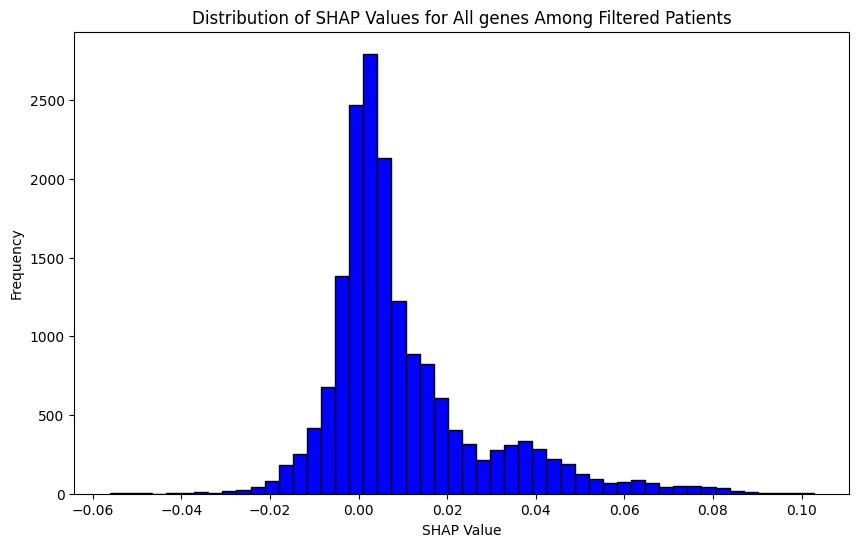

In [10]:
# Histogram of all feature scores
plt.figure(figsize=(10, 6))
plt.hist(all_feature_scores, bins=50, color='blue', edgecolor='black')
plt.xlabel('SHAP Value')
plt.ylabel('Frequency')
plt.title('Distribution of SHAP Values for All genes Among Filtered Patients')
# plt.savefig('./figures/subset_shap_values_histogram_filtered_patients.png', dpi=900)
plt.show()

In [ ]:
# Check if these two gene sets are significantly different

In [22]:
import pickle
with open('./backup_augest/shap_rnaseq_subset(10features)_v2balanced.pkl', 'rb') as f:
    results_dict = pickle.load(f)

In [13]:
# Define the lists of genes you are interested in
special_genes = ['APOE', 'TREM2', 'CR1', 'CD33', 'SLC24A4', 'ANPEP', 'CASS4', 'APOC1', 'CALHM1', 'PTK2B', 'TUBA4A', 'HLA-DRB5', 'HLA-DRB1', 'INPP5D', 'MEF2C']
other_genes = ['GSTM1', 'CARTPT', 'MIR3976HG', 'LINC02263', 'PVALB', 'LINC00507', 'LINC01164', 'CTXN3', 'ROS1', 'SLC27A6', 'LINC01007', 'POSTN', 'LINC00898', 'GPR26', 'MEPE']


In [24]:
import pandas as pd
import numpy as np
from scipy import stats

# Assume 'results_dict' is your dictionary containing SHAP values and other details for each sample
# Assume 'special_genes' and 'other_genes' are your two sets of genes

# Extracting SHAP values
shap_values = {sample: data['shap_values'] for sample, data in results_dict.items() if data['label'] == 1 and data['correct']}
df_shap = pd.DataFrame(shap_values).T  # Transpose to make genes as columns

# Calculate mean SHAP values for each gene
mean_shap_special = df_shap[special_genes].mean()
mean_shap_others = df_shap[other_genes].mean()

# Shapiro-Wilk Test for normality
stat_special, p_special = stats.shapiro(mean_shap_special)
stat_others, p_others = stats.shapiro(mean_shap_others)

print(f"Normality test for special genes: Statistics={stat_special:.3f}, p-value={p_special:.3f}")
print(f"Normality test for other genes: Statistics={stat_others:.3f}, p-value={p_others:.3f}")

# Interpreting the results
if p_special < 0.05:
    print("Special genes data do not follow a normal distribution.")
else:
    print("Special genes data follow a normal distribution.")

if p_others < 0.05:
    print("Other genes data do not follow a normal distribution.")
else:
    print("Other genes data follow a normal distribution.")


Normality test for special genes: Statistics=0.781, p-value=0.002
Normality test for other genes: Statistics=0.726, p-value=0.000
Special genes data do not follow a normal distribution.
Other genes data do not follow a normal distribution.


In [23]:
from scipy.stats import mannwhitneyu

# Assume mean_shap_special and mean_shap_others are already calculated as shown previously

# Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(mean_shap_special, mean_shap_others, alternative='two-sided')

print(f"Mann-Whitney U Test: U-Statistic={u_statistic:.3f}, p-value={p_value:.3f}")
print(p_value)

# Interpreting the results
if p_value < 0.05:
    print("There is a statistically significant difference between the two gene sets.")
else:
    print("There is no statistically significant difference between the two gene sets.")


Mann-Whitney U Test: U-Statistic=103.000, p-value=0.709
0.7089232340537643
There is no statistically significant difference between the two gene sets.


In [25]:
import numpy as np

# Assuming results_dict is your dictionary containing the results
special_genes = ['APOE', 'TREM2', 'CR1', 'CD33', 'SLC24A4', 'ANPEP', 'CASS4', 'APOC1', 'CALHM1', 'PTK2B', 'TUBA4A', 'HLA-DRB5', 'HLA-DRB1', 'INPP5D', 'MEF2C']
all_shap_values_special = []
all_shap_values_other = []
average_score = 0.78

# Collect all SHAP values for each gene set
for entry in results_dict.values():
    if entry['label'] == 1 and entry['correct'] and entry['predictive_score'] > average_score:
        for gene, shap_value in entry['shap_values'].items():
            if gene in special_genes:
                all_shap_values_special.append(shap_value)
            else:
                all_shap_values_other.append(shap_value)

# Convert lists to numpy arrays for analysis
shap_values_special = np.array(all_shap_values_special)
shap_values_other = np.array(all_shap_values_other)

def permutation_test(data1, data2, num_permutations=20000):
    combined_data = np.concatenate([data1, data2])
    original_diff = np.abs(np.mean(data1) - np.mean(data2))
    count = 0
    for _ in range(num_permutations):
        np.random.shuffle(combined_data)
        new_data1 = combined_data[:len(data1)]
        new_data2 = combined_data[len(data1):]
        new_diff = np.abs(np.mean(new_data1) - np.mean(new_data2))
        if new_diff >= original_diff:
            count += 1
    return count / num_permutations

# Perform the permutation test
p_value = permutation_test(shap_values_special, shap_values_other)
print(f"Permutation test p-value: {p_value:.10f}")
if p_value < 0.05:
    print("There is a statistically significant difference between the two gene sets.")
else:
    print("There is no statistically significant difference between the two gene sets.")


Permutation test p-value: 0.0000000000
There is a statistically significant difference between the two gene sets.


In [26]:
import numpy as np

def permutation_test_with_variance(data1, data2, num_permutations=10000):
    combined_data = np.concatenate([data1, data2])
    original_mean_diff = np.abs(np.mean(data1) - np.mean(data2))
    original_var_diff = np.abs(np.var(data1, ddof=1) - np.var(data2, ddof=1))
    original_stat = original_mean_diff / np.sqrt((original_var_diff + 1e-6))  # Adding a small constant to avoid division by zero

    count = 0
    for _ in range(num_permutations):
        np.random.shuffle(combined_data)
        new_data1 = combined_data[:len(data1)]
        new_data2 = combined_data[len(data1):]
        new_mean_diff = np.abs(np.mean(new_data1) - np.mean(new_data2))
        new_var_diff = np.abs(np.var(new_data1, ddof=1) - np.var(new_data2, ddof=1))
        new_stat = new_mean_diff / np.sqrt((new_var_diff + 1e-6))

        if new_stat >= original_stat:
            count += 1
    return count / num_permutations

# Use this function with your SHAP values
p_value = permutation_test_with_variance(shap_values_special, shap_values_other)
print(f"Permutation test including variance p-value: {p_value:.4f}")


Permutation test including variance p-value: 0.0120


In [ ]:
# Tissue and study dictribution among filtered patient samples

import pandas as pd
metadata = pd.read_csv('metadata_merged.csv', index_col=0)

# Calculate the average predictive score for correctly classified patients
average_score = sum(v['predictive_score'] for v in results_dict.values() if v['label'] == 1 and v['correct']) / sum(1 for v in results_dict.values() if v['label'] == 1 and v['correct'])

# Filter to get specimen IDs of correctly classified patients with scores above average
above_average_patients = [v['specimen_id'] for v in results_dict.values() if v['label'] == 1 and v['correct'] and v['predictive_score'] > average_score]

# Check these specimen IDs in the metadata and get their tissue types and study
filtered_metadata = metadata.loc[metadata.index.isin(above_average_patients)]

# Count the number of samples in each tissue type and study
tissue_counts = filtered_metadata['tissue'].value_counts()
study_counts = filtered_metadata['study'].value_counts()

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plotting the histograms
ax[0].bar(tissue_counts.index, tissue_counts.values, color='darkblue')
ax[0].set_title('Distribution of filtered samples among tissue types')
ax[0].set_xlabel('Tissue Type')
ax[0].set_ylabel('Number of samples')

ax[1].bar(study_counts.index, study_counts.values, color='darkgreen')
ax[1].set_title('Distribution of filtered samples among datasets')
ax[1].set_xlabel('Study')
ax[1].set_ylabel('Number of samples')

# Improve layout and show the plot
plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('./figures/subset_tissue_study_distributions_filtered_samples.png', dpi=900)

In [5]:
# samples with highest predictive scores

# Filter to include only patient samples (label 1) and sort them by predictive score in descending order
top_patients = sorted(
    (v for v in results_dict.values() if v['label'] == 1),
    key=lambda x: x['predictive_score'], reverse=True
)[:20]  # Get top 10

# Print the specimen IDs and predictive scores of these top 10 patients
for patient in top_patients:
    print(f"Specimen ID: {patient['specimen_id']}, Predictive Score: {patient['predictive_score']:.3f}")

Specimen ID: BM_36_541, Predictive Score: 0.999
Specimen ID: hB_RNA_16945, Predictive Score: 0.999
Specimen ID: hB_RNA_10742_resequenced, Predictive Score: 0.999
Specimen ID: hB_RNA_10542, Predictive Score: 0.999
Specimen ID: BM_36_544, Predictive Score: 0.998
Specimen ID: hB_RNA_8175, Predictive Score: 0.998
Specimen ID: BM_36_361, Predictive Score: 0.997
Specimen ID: hB_RNA_17155, Predictive Score: 0.997
Specimen ID: BM_36_338, Predictive Score: 0.997
Specimen ID: hB_RNA_10512_L43C014, Predictive Score: 0.996
Specimen ID: hB_RNA_8835, Predictive Score: 0.995
Specimen ID: BM_36_491, Predictive Score: 0.995
Specimen ID: hB_RNA_12322_resequenced, Predictive Score: 0.995
Specimen ID: hB_RNA_10412, Predictive Score: 0.994
Specimen ID: hB_RNA_8635, Predictive Score: 0.994
Specimen ID: hB_RNA_12201_resequenced, Predictive Score: 0.994
Specimen ID: BM_36_418, Predictive Score: 0.993
Specimen ID: hB_RNA_12322, Predictive Score: 0.993
Specimen ID: hB_RNA_8545, Predictive Score: 0.993
Specimen 

## on 4k and 5k merged datasets

### Hyperparam tuning

In [ ]:

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from scipy.stats import randint, uniform
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score

# Load the metadata
metadata_path = 'metadata_merged.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Load the dataset
dataset_path = 'rnaseq_merged_4k.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Ensure the feature dataset is aligned and ordered according to the metadata index
df_features = df_features.loc[df_metadata.index]

# Define features and target variable
X = df_features
y = df_metadata['diagnosis']

# Initialize the RandomForestClassifier with balanced class weight
rf = RandomForestClassifier(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 700),
    'max_depth': randint(10, 40),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', 0.08, 0.13, 0.16, 0.21]  # Range between 10% to 90% of the features
}

# Define a stratified k-fold cross-validation strategy
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Setup RandomizedSearchCV with 100 iterations and 10-fold cross-validation, focusing on F1 score for class 1
f1_scorer = make_scorer(f1_score, average='binary', labels=[1])  # Corrected the average parameter if it's binary classification
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=120, cv=stratified_kfold, scoring=f1_scorer, random_state=42, n_jobs=9)
random_search.fit(X, y)

# Print the best hyperparameters and the best score obtained
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Use the best estimator to perform cross-validation, focusing on multiple metrics for both classes
rf_best = random_search.best_estimator_
cv_results = cross_validate(rf_best, X, y, cv=10, scoring={'f1_Control': make_scorer(f1_score, labels=[0], average='binary'),
                                                           'f1_AD': make_scorer(f1_score, labels=[1], average='binary'),
                                                           'precision_Control': make_scorer(precision_score, labels=[0], average='binary'),
                                                           'precision_AD': make_scorer(precision_score, labels=[1], average='binary'),
                                                           'recall_Control': make_scorer(recall_score, labels=[0], average='binary'),
                                                           'recall_AD': make_scorer(recall_score, labels=[1], average='binary'),
                                                           'roc_auc': 'roc_auc'})


# Print the cross-validation results for each metric for both classes
scoring_metrics = ['f1_Control', 'f1_AD', 'precision_Control', 'precision_AD', 'recall_Control', 'recall_AD', 'roc_auc']
for metric in scoring_metrics:
    print(f"Mean CV {metric}: {cv_results['test_' + metric].mean()}\n")


### RF shap main code

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, accuracy_score
import shap
import pandas as pd
from joblib import Parallel, delayed
import pickle

def process_fold(train_ix, test_ix, X, y, metadata, background_data):
    test_individual_id = metadata.iloc[test_ix[0]]['individualID']
    train_individual_ids = metadata.iloc[train_ix]['individualID']

    # Exclude training data that has the same individualID as the test sample
    exclude_ix = train_individual_ids[train_individual_ids == test_individual_id].index
    train_ix = [ix for ix in train_ix if ix not in exclude_ix]

    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    model = RandomForestClassifier(
        n_estimators=506,
        max_depth=29,
        min_samples_split=6,
        min_samples_leaf=4,
        max_features=0.16,
        random_state=42,
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[0][1]  # Probability of being AD

    explainer = shap.TreeExplainer(model, data=background_data, model_output='probability')
    shap_values = explainer.shap_values(X_test)
    
    
    # Select the appropriate index for SHAP values based on the predicted class
    relevant_shap_values = [v[1] for v in shap_values[0]]  # Extract the relevant values for class 1
    print(relevant_shap_values)
    specimen_id = metadata.index[test_ix[0]]
    
    # Creating a dictionary of feature names to their SHAP values
    shap_values_dict = {X.columns[i]: relevant_shap_values[i] for i in range(len(relevant_shap_values))}
    print(shap_values_dict)
    # Building the results dictionary
    results_dict = {
        'specimen_id': specimen_id,
        'correct': (y_pred[0] == y_test.iloc[0]),
        'label': y_test.iloc[0],
        'shap_values': shap_values_dict,  # Only store if class 1
        'predictive_score': y_proba,
        'predicted_label': y_pred[0]
    }

    print("One fold done")
    return results_dict

# Load data
dataset_path = 'rnaseq_merged_4k.csv'
X = pd.read_csv(dataset_path, index_col=0)
metadata = pd.read_csv('metadata_merged.csv', index_col=0)
X = X.loc[metadata.index]
y = metadata['diagnosis']

# Select 1000 samples for the background dataset
background_data = X.sample(min(100, len(X)), random_state=42)

# Execute Leave-One-Out Cross-Validation
loo = LeaveOneOut()
results = Parallel(n_jobs=1)(delayed(process_fold)(train_ix, test_ix, X, y, metadata, background_data) for train_ix, test_ix in loo.split(X))

# Evaluate and report model performance
y_true = [result['label'] for result in results]
y_pred = [result['predicted_label'] for result in results]
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=['Control', 'AD'], digits=4)

print(f'Overall model accuracy: {accuracy:.2f}')
print(report)

# Save SHAP values dictionary
shap_values_per_sample = {result['specimen_id']: result for result in results}
with open('shap_rnaseq_4k_v1.pkl', 'wb') as f:
    pickle.dump(shap_values_per_sample, f)
print('SHAP values dictionary saved.')


KeyboardInterrupt: 

# Filtering shap values dict

## 1. Checking the overall distribution

In [ ]:
import pickle
with open('shap_rnaseq_subset(10features).pkl', 'rb') as f:
    results_dict = pickle.load(f)

In [ ]:
results_dict

{'487_120515': {'specimen_id': '487_120515',
  'correct': True,
  'label': 0,
  'shap_values': {'APOE': 0.011029920759611614,
   'TREM2': -0.0700125822531183,
   'CR1': -0.00676056093755264,
   'CD33': -0.016893730598551003,
   'SLC24A4': 0.01134232771611451,
   'ANPEP': 0.006609760356544996,
   'CASS4': -0.00238694804527249,
   'APOC1': -0.0048011647135482605,
   'CALHM1': 0.00046524774658195155,
   'PTK2B': -0.02199079352388253,
   'TUBA4A': -0.0031345139076101704,
   'HLA-DRB5': -0.0013806493860879954,
   'HLA-DRB1': -0.019166021719968215,
   'INPP5D': -0.05299703353361366,
   'MEF2C': -0.009871666103393295,
   'GSTM1': 0.010028776180557628,
   'CARTPT': -0.009335920579903102,
   'MIR3976HG': 0.0012334486082443163,
   'LINC02263': 0.005839796750393162,
   'PVALB': -0.0021079169858646196,
   'LINC00507': -0.01367391451022243,
   'LINC01164': -0.012286700993306426,
   'CTXN3': -0.0034827788712607343,
   'ROS1': 0.009513764052127982,
   'SLC27A6': -0.00432641769764615,
   'LINC01007': 

In [ ]:
# Initialize counters and accumulators
total_patients = 0
correctly_classified = 0
total_score = 0
num_scores_above_average = 0

# Analyze the dictionary
for entry in results_dict.values():
    if entry['label'] == 1:  # Check if the sample is a patient
        total_patients += 1
        if entry['correct']:
            correctly_classified += 1
            total_score += entry['predictive_score']

# Calculate average score if there are any correctly classified patients
average_score = total_score / correctly_classified if correctly_classified else 0

# Find number of patients with score above average
for entry in results_dict.values():
    if entry['label'] == 1 and entry['correct'] and entry['predictive_score'] > average_score:
        num_scores_above_average += 1

# Print results
print(f"Total number of patients: {total_patients}")
print(f"Number of correctly classified patients: {correctly_classified}")
print(f"Average predictive score among correctly classified patients: {average_score:.3f}")
print(f"Number of patients with scores above average: {num_scores_above_average}")

Total number of patients: 1363
Number of correctly classified patients: 1264
Average predictive score among correctly classified patients: 0.777
Number of patients with scores above average: 626


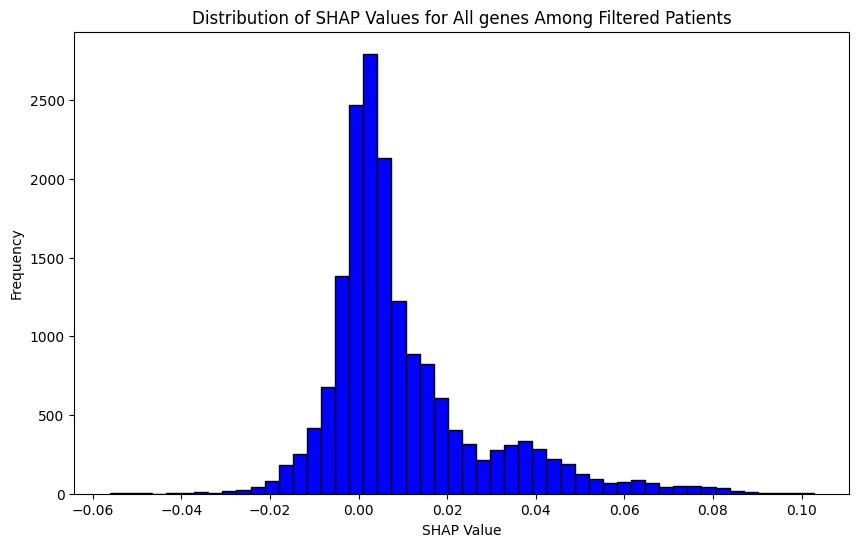

In [ ]:
# Histogram of all feature scores
plt.figure(figsize=(10, 6))
plt.hist(all_feature_scores, bins=50, color='blue', edgecolor='black')
plt.xlabel('SHAP Value')
plt.ylabel('Frequency')
plt.title('Distribution of SHAP Values for All genes Among Filtered Patients')
# plt.savefig('./figures/subset_shap_values_histogram_filtered_patients.png', dpi=900)
plt.show()

In [ ]:
# Tissue and study dictribution among filtered patient samples

import pandas as pd
metadata = pd.read_csv('metadata_merged.csv', index_col=0)

# Calculate the average predictive score for correctly classified patients
average_score = sum(v['predictive_score'] for v in results_dict.values() if v['label'] == 1 and v['correct']) / sum(1 for v in results_dict.values() if v['label'] == 1 and v['correct'])

# Filter to get specimen IDs of correctly classified patients with scores above average
above_average_patients = [v['specimen_id'] for v in results_dict.values() if v['label'] == 1 and v['correct'] and v['predictive_score'] > average_score]

# Check these specimen IDs in the metadata and get their tissue types and study
filtered_metadata = metadata.loc[metadata.index.isin(above_average_patients)]

# Count the number of samples in each tissue type and study
tissue_counts = filtered_metadata['tissue'].value_counts()
study_counts = filtered_metadata['study'].value_counts()

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plotting the histograms
ax[0].bar(tissue_counts.index, tissue_counts.values, color='darkblue')
ax[0].set_title('Distribution of filtered samples among tissue types')
ax[0].set_xlabel('Tissue Type')
ax[0].set_ylabel('Number of samples')

ax[1].bar(study_counts.index, study_counts.values, color='darkgreen')
ax[1].set_title('Distribution of filtered samples among datasets')
ax[1].set_xlabel('Study')
ax[1].set_ylabel('Number of samples')

# Improve layout and show the plot
plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('./figures/subset_tissue_study_distributions_filtered_samples.png', dpi=900)

## 2. Filtering the dictionary (by threshold)

In [ ]:
import pickle
with open('shap_imbalance_v4_4k.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

In [ ]:
shap_values_per_sample

In [ ]:
# samples with highest predictive scores

# Filter to include only patient samples (label 1) and sort them by predictive score in descending order
top_patients = sorted(
    (v for v in results_dict.values() if v['label'] == 1),
    key=lambda x: x['predictive_score'], reverse=True
)[:20]  # Get top 10

# Print the specimen IDs and predictive scores of these top 10 patients
for patient in top_patients:
    print(f"Specimen ID: {patient['specimen_id']}, Predictive Score: {patient['predictive_score']:.3f}")

In [ ]:
# Count the number of correctly classified AD patients
correctly_classified_ad_patients = sum(
    1 for result in shap_values_per_sample.values() if result['correct'] and result['label'] == 1
)

print(f'Number of correctly classified AD patients: {correctly_classified_ad_patients}')


Number of correctly classified AD patients: 574


In [ ]:
shap_values_per_sample

In [ ]:
# This contains samples with higher than average predcition score among correctly-classified AD samples

# Calculate the average predictive score among AD correctly classified samples
average_score_ad_correct = np.mean([value['predictive_score'] for value in shap_values_per_sample.values() if value['label'] == 1 and value['correct']])

# Filter the dictionary to include only the samples that are AD (1), correctly classified, and have a predictive score higher than the average among AD correctly classified samples
filtered_dict = {key: value for key, value in shap_values_per_sample.items()
                 if value['label'] == 1 and value['correct'] and value['predictive_score'] > average_score_ad_correct}

print(f"Number of samples in the filtered dictionary: {len(filtered_dict)}")


Number of samples in the filtered dictionary: 302


In [ ]:
filtered_dict

In [ ]:
f_d = {
    result['specimen_id']: {
        gene: shap_value for gene, shap_value in result['shap_values'].items() if shap_value > 0.0006
    }
    for result in filtered_dict.values()
}

In [ ]:
f_d

{'366_120502': {'ENSG00000003989': 0.0023666827559814816,
  'ENSG00000006047': 0.001071828837817059,
  'ENSG00000008517': 0.0005754512127842601,
  'ENSG00000012223': 0.004199135402181037,
  'ENSG00000012817': 0.0008775277280715478,
  'ENSG00000016602': 0.0005266116341654246,
  'ENSG00000019991': 0.0006063759501501985,
  'ENSG00000020577': 0.0007964220199361551,
  'ENSG00000023445': 0.0006065162307485879,
  'ENSG00000026508': 0.0010792414159021201,
  'ENSG00000038945': 0.0005978312828825482,
  'ENSG00000042062': 0.0037175165491977317,
  'ENSG00000053702': 0.0019404670917497824,
  'ENSG00000073756': 0.0008614139494359064,
  'ENSG00000074219': 0.0015259757835638427,
  'ENSG00000079101': 0.0007496504561344146,
  'ENSG00000081479': 0.000512735508885605,
  'ENSG00000086159': 0.0046173643812107215,
  'ENSG00000086289': 0.0010420856712412831,
  'ENSG00000087245': 0.0005323101960875861,
  'ENSG00000087494': 0.0028984543541643874,
  'ENSG00000096060': 0.0021006579844346715,
  'ENSG00000099715': 

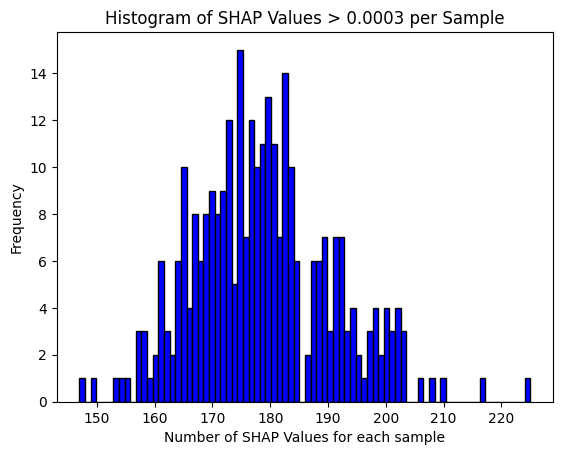

In [ ]:
import matplotlib.pyplot as plt

# Using the filtered_dict from the previous step
num_shap_values_per_sample = [len(values) for values in f_d.values()]

# Draw a histogram
plt.hist(num_shap_values_per_sample, bins=80, color='blue', edgecolor='black')
plt.xlabel('Number of SHAP Values for each sample')
plt.ylabel('Frequency')
plt.title('Histogram of SHAP Values > 0.0003 per Sample')
plt.show()


In [ ]:
# Assuming your dictionary is stored in a variable named 'filtered_dict_genes_only'
gene_union = set()
for genes in f_d.values():
    gene_union.update(genes)

print(f'Number of unique genes across all patients: {len(gene_union)}')


In [ ]:
# Create a list to store the sets of gene names with positive SHAP values for each correctly classified patient
positive_genes_sets = [set(gene for gene, shap_value in value['shap_values'].items() if shap_value > 0) for value in filtered_dict.values() if value['label'] == 1 and value['correct']]

# Find the intersection of all sets to get the common gene names
common_genes = set.intersection(*positive_genes_sets)

# Print the common genes
print("Common genes among correctly classified patients:")
print(common_genes)


In [ ]:
with open('shap_samp_genes_final_july_22.pkl', 'wb') as f:
    pickle.dump(f_d, f)

## 3. GSEA for genes common among the tissue samples

In [3]:
import pickle
with open('shap_samp_genes_final_july_22.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

In [4]:
shap_values_per_sample

{'366_120502': ['ENSG00000166535',
  'ENSG00000157833',
  'ENSG00000111087',
  'ENSG00000165092',
  'ENSG00000203952',
  'ENSG00000188269',
  'ENSG00000228058',
  'ENSG00000230537',
  'ENSG00000198417',
  'ENSG00000086159',
  'ENSG00000148482',
  'ENSG00000188039',
  'ENSG00000012223',
  'ENSG00000139410',
  'ENSG00000116717',
  'ENSG00000183963',
  'ENSG00000237422',
  'ENSG00000206113',
  'ENSG00000196517',
  'ENSG00000042062',
  'ENSG00000228252',
  'ENSG00000223478',
  'ENSG00000279727',
  'ENSG00000143772',
  'ENSG00000271714',
  'ENSG00000173068',
  'ENSG00000142731',
  'ENSG00000171388',
  'ENSG00000143382',
  'ENSG00000287134',
  'ENSG00000287689',
  'ENSG00000135926',
  'ENSG00000205562',
  'ENSG00000087494',
  'ENSG00000162975',
  'ENSG00000142449',
  'ENSG00000197635',
  'ENSG00000250786',
  'ENSG00000168209',
  'ENSG00000188779',
  'ENSG00000225449',
  'ENSG00000003989',
  'ENSG00000206159',
  'ENSG00000261701',
  'ENSG00000281501',
  'ENSG00000286215',
  'ENSG00000096060',

In [5]:
import pandas as pd

# Load your metadata and assume 'specimen_id' is the index
metadata = pd.read_csv('metadata_merged.csv', index_col=0)
metadata


individualID  diagnosis  tissue  race  spanish  apoe4_allele  sex  \
specimenID                                                                     
487_120515     R9904978          0       3   1.0      2.0             0    0   
182_120424     R9818080          0       3   1.0      2.0             0    0   
193_120424     R9817161          1       3   1.0      2.0             0    1   
694_120605     R9817056          0       3   1.0      2.0             0    0   
366_120502     R9809661          1       3   1.0      2.0             1    1   
...                 ...        ...     ...   ...      ...           ...  ...   
948_CBE             948          1       2   NaN      NaN             0    1   
952_CBE             952          1       2   NaN      NaN             1    1   
966_CBE             966          1       2   NaN      NaN             2    1   
976_CBE             976          1       2   NaN      NaN             1    1   
991_CBE             991          1       2   NaN      NaN             1    0   

            batch        pmi  RIN   RIN2  age_death  \
specimenID                                            
487_120515      4  12.433333  6.9  47.61  72.720055   
182_120424      7  16.000000  8.4  70.56  81.111567   
193_120424      4   1.750000  7.1  50.41  80.906229   
694_120605      4   6.416667  7.1  50.41  87.753593   
366_120502      7  17.416667  7.4  54.76  90.000000   
...           ...        ...  ...    ...        ...   
948_CBE        24   4.000000  7.9  62.41  82.000000   
952_CBE        30   3.000000  9.0  81.00  83.000000   
966_CBE        22  16.000000  8.8  77.44  79.000000   
976_CBE        19   7.000000  8.3  68.89  90.000000   
991_CBE        27  12.077553  9.3  86.49  87.000000   

            AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED  \
specimenID                                                 
487_120515                                      0.931411   
182_120424                                      0.944450   
193_120424                                      0.958718   
694_120605                                      0.960609   
366_120502                                      0.931962   
...                                                  ...   
948_CBE                                         0.971513   
952_CBE                                         0.970183   
966_CBE                                         0.971717   
976_CBE                                         0.975052   
991_CBE                                         0.966562   

            RnaSeqMetrics_PCT_INTRONIC_BASES  \
specimenID                                     
487_120515                          0.225013   
182_120424                          0.172408   
193_120424                          0.203963   
694_120605                          0.201002   
366_120502                          0.205742   
...                                      ...   
948_CBE                             0.218398   
952_CBE                             0.289034   
966_CBE                             0.143079   
976_CBE                             0.134213   
991_CBE                             0.128365   

            RnaSeqMetrics_PCT_INTERGENIC_BASES  \
specimenID                                       
487_120515                            0.058488   
182_120424                            0.041036   
193_120424                            0.048166   
694_120605                            0.045065   
366_120502                            0.048650   
...                                        ...   
948_CBE                               0.102550   
952_CBE                               0.107290   
966_CBE                               0.069472   
976_CBE                               0.080812   
991_CBE                               0.122418   

            RnaSeqMetrics_PCT_CODING_BASES ethnicity   study  
specimenID                                                    
487_120515                        0.342722       NaN  ROSMAP  
182_1204

In [6]:
# Group specimen IDs by tissue
tissue_groups = metadata.groupby('tissue').groups

# Find common genes for each tissue
common_genes_by_tissue = {}
for tissue, indices in tissue_groups.items():
    # Filter gene lists that are associated with the current tissue's specimen IDs
    gene_lists = [shap_values_per_sample[specimen_id] for specimen_id in indices if specimen_id in shap_values_per_sample]
    
    # Find the intersection of all gene lists in this tissue
    if gene_lists:  # Ensure there are gene lists to intersect
        common_genes = set(gene_lists[0])  # Start with the genes of the first specimen
        for genes in gene_lists[1:]:
            common_genes.intersection_update(genes)  # Intersect with the genes of each subsequent specimen
        common_genes_by_tissue[tissue] = common_genes
    else:
        common_genes_by_tissue[tissue] = set()  # No common genes if no gene lists

# Print common genes for each tissue
for tissue, genes in common_genes_by_tissue.items():
    print(f"Common genes in tissue {tissue}: {genes}")

Common genes in tissue 1: {'ENSG00000281327', 'ENSG00000166535'}
Common genes in tissue 2: set()
Common genes in tissue 3: set()
Common genes in tissue 4: set()
Common genes in tissue 5: set()
Common genes in tissue 6: set()
Common genes in tissue 7: set()
Common genes in tissue 8: set()
Common genes in tissue 9: set()


## Filtering dataset and metadata -- export csv

### Checking all the datasets (inputs)

In [ ]:
with open('shap_22_samp_genes.pkl', 'rb') as f:
    filtered_dict_genes_only = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'shap_22_samp_genes.pkl'

In [ ]:
filtered_dict_genes_only

In [ ]:
rnaseq_counts = pd.read_csv('ROSMAP_counts_v10_imbalance_4k.csv', index_col=0)

In [ ]:
rnaseq_counts

In [ ]:
metadata = pd.read_csv('./metadata_v6_rosmap.csv', index_col=0)

In [ ]:
metadata

### Code for creating csv of interesting patients

In [ ]:
import pandas as pd
import pickle

# Load the dictionary from the pickle file
with open('shap_samp_genes_final_july_22.pkl', 'rb') as f:
    filtered_dict_genes_only = pickle.load(f)

# Load the RNA-seq counts dataset
rnaseq_counts = pd.read_csv('ROSMAP_counts_v10_imbalance_4k.csv', index_col=0)

# Load the metadata
metadata = pd.read_csv('./backup/metadata_v6_rosmap.csv', index_col=0)

# Filter the metadata to keep only the samples that are keys in the dictionary
filtered_metadata = metadata.loc[filtered_dict_genes_only.keys()]

# Filter the RNA-seq counts dataset to keep only the samples that are keys in the dictionary
filtered_rnaseq_counts = rnaseq_counts.loc[filtered_dict_genes_only.keys()]

# Merge the filtered RNA-seq counts dataset with the corresponding filtered metadata
merged_dataset = pd.merge(filtered_metadata, filtered_rnaseq_counts, left_index=True, right_index=True)

# Save the merged dataset to a CSV file
output_path = 'ROSMAP_shap_samples_v13_4k_july_22.csv'
merged_dataset.to_csv(output_path)
print(f'Merged dataset saved to {output_path}')


Merged dataset saved to ROSMAP_shap_samples_v13_4k_july_22.csv


In [ ]:
import pandas as pd
rnaseq_counts = pd.read_csv('ROSMAP_shap_samples_v13_4k_july_22.csv', index_col=0)

In [ ]:
rnaseq_counts

individualID  diagnosis  tissue  race  spanish  apoe4_allele  \
366_120502        R9809661          1       3   1.0      2.0             1   
52_120416         R9809441          1       3   1.0      2.0             0   
493_120515        R9771008          1       3   1.0      2.0             0   
654_120529        R9254464          1       3   1.0      2.0             0   
76_120417         R9137173          1       3   1.0      2.0             1   
...                    ...        ...     ...   ...      ...           ...   
RISK_437          R9425423          1       3   1.0      2.0             0   
RISK_46_rerun     R6998518          1       6   1.0      2.0             1   
RISK_50_rerun     R1438115          1       6   1.0      2.0             0   
RISK_51_rerun     R1753622          1       3   1.0      2.0             2   
RISK_67_rerun     R6925335          1       3   1.0      2.0             0   

               sex  batch        pmi  RIN  ...  ENSG00000287815  \
366_120502       1      7  17.416667  7.4  ...         0.139377   
52_120416        1      6   4.450000  6.4  ...         0.635089   
493_120515       0      4   3.083333  6.9  ...         1.428795   
654_120529       1      5   7.500000  5.7  ...        -0.432613   
76_120417        1      4   5.000000  6.7  ...         0.326804   
...            ...    ...        ...  ...  ...              ...   
RISK_437         1     17  16.516667  2.8  ...         0.831489   
RISK_46_rerun    1     17  15.666667  1.3  ...         1.210712   
RISK_50_rerun    1     17   6.750000  2.0  ...         0.865323   
RISK_51_rerun    1     17   7.266667  1.2  ...         0.394446   
RISK_67_rerun    0     17  38.333333  3.4  ...         1.053959   

               ENSG00000287900  ENSG00000287925  ENSG00000287978  \
366_120502            0.833608         1.092943         1.707821   
52_120416             0.925383         0.934533         0.243795   
493_120515            1.639106         0.797550         1.391738   
654_120529            1.611975         0.995050         1.056309   
76_120417             1.561044        -0.693230         2.267006   
...                        ...              ...              ...   
RISK_437              1.606163         1.261024         0.970229   
RISK_46_rerun         1.852605         0.874080         1.637173   
RISK_50_rerun         1.656371         1.406023         1.376175   
RISK_51_rerun         1.370487         0.705370         0.248185   
RISK_67_rerun         1.893846         1.672508         2.134204   

               ENSG00000287985  ENSG00000288033  ENSG00000288048  \
366_120502            1.329693         0.960361         0.552581   
52_120416            -0.272757         0.441563         1.028262   
493_120515            1.096291         1.636495         0.642124   
654_120529            1.156011        -0.180843         1.239391   
76_120417             1.651049         0.810119         0.634079   
...                        ...              ...              ...   
RISK_437              0.885443         0.769497        -1.164219   
RISK_46_rerun        -0.111618         1.523786         0.782975   
RISK_50_rerun         0.480853         1.533203        -0.687184   
RISK_51_rerun        -0.039540         0.556972         0.763065   
RISK_67_rerun         0.823070         1.460374        -0.035521   

              ENSG00000288049  ENSG00000288062  ENSG00000288107  
366_120502          -5.109539         3.378009         1.674681  
52_120416           -4.070924         2.869645         1.041287  
493_120515          -0.998250         3.053631         1.721891  
654_120529          -5.325863         3.342447         2.135636  
76_120417           -4.042548         3.783358         1.414760  
...                       ...              ...              ...  
RISK_437            -4.505437         3.107846         1.777936  
RISK_46_rerun       -5.904522         1.779158         2.831715  
RISK_50_rerun       -5.655950         2.7959

In [ ]:
for i in rnaseq_counts.columns:
    print(i)
# Study is 17

individualID
diagnosis
tissue
race
spanish
apoe4_allele
sex
batch
pmi
RIN
RIN2
age_death
AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED
RnaSeqMetrics_PCT_INTRONIC_BASES
RnaSeqMetrics_PCT_INTERGENIC_BASES
RnaSeqMetrics_PCT_CODING_BASES
ethnicity
study
ENSG00000000971
ENSG00000001617
ENSG00000001626
ENSG00000001630
ENSG00000002587
ENSG00000002745
ENSG00000002746
ENSG00000002933
ENSG00000003096
ENSG00000003137
ENSG00000003436
ENSG00000003989
ENSG00000004468
ENSG00000004799
ENSG00000004838
ENSG00000005059
ENSG00000005381
ENSG00000005448
ENSG00000005513
ENSG00000005844
ENSG00000005961
ENSG00000005981
ENSG00000006016
ENSG00000006042
ENSG00000006047
ENSG00000006071
ENSG00000006116
ENSG00000006128
ENSG00000006283
ENSG00000006327
ENSG00000006377
ENSG00000006432
ENSG00000006453
ENSG00000006611
ENSG00000006747
ENSG00000007171
ENSG00000007516
ENSG00000007933
ENSG00000008056
ENSG00000008226
ENSG00000008394
ENSG00000008517
ENSG00000008710
ENSG00000009709
ENSG00000009790
ENSG00000009950
ENSG00000010278